# Project assignment B - explainer notebook
## 1. introduction
The overall goal of this project is to investigate how the COVID19 virus and its associated lock down has affected traffic in Copenhagen and the surrounding area. More specifically, data on passenger numbers in buses will be used as an indicator of how public transport is affected, and data on the speeds of buses will be used as an indicator of whether traffic on the roads has fallen. After the initial analysis, it will be investigated how traffic and public transport are affected differently in the municipalities, and whether these differences can be explained by the demographics of the municipalities. The municipalities included in this project are the following:
- København
- Frederiksberg 
- Ballerup 
- Brøndby 
- Dragør
- Gentofte 
- Gladsaxe 
- Glostrup
- Herlev
- Albertslund
- Hvidovre  
- Høje-Taastrup 
- Rødovre 
- Ishøj
- Tårnby 
- Vallensbæk

In total 16 municipalities and collectively, these are referred to as focus municipalities through the report
## 2. Læse vejledning

In [7]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
import json
import folium
from branca.colormap import linear
from folium.features import DivIcon
from bokeh.io import show, output_notebook, output_file
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, FactorRange, Legend, HoverTool, DatetimeTickFormatter, BoxAnnotation, Toggle, Label
from bokeh.transform import dodge
from bokeh.layouts import layout, gridplot, row, column, widgetbox
from bokeh.embed import file_html
from bokeh.resources import CDN
from sklearn.linear_model import LinearRegression
import bokeh.palettes
from pyproj import Proj, transform
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

output_notebook()

Loading BokehJS ...

## 3. Motivation
The primary goal of lockdown in Denmark was to avoid close contact between many people and as many as possible to stay at home. A good measure of whether the population has adapted to this is the traffic on the roads and the number of passengers in the buses.
### 3.1 Datasets - What is your dataset?
In this section, all the datasets used in this project are presented. First all the datasets are loaded in the code cell below, and subsequently the contents of the data sets are described in their respective subsections.

In [10]:
#path = '/Users/tuethomsen28/Google Drev/SocialDataVizz/Data/'
path = '/Users/Lasse/Google Drev/SocialDataVizz/Data/'

# speed data BESKREVET
df_speed_muni = pd.read_csv(os.path.join(path,'Hast_dagsbaseret_kommune.csv'),
                            encoding='ISO8859-1',sep=";",engine="python",decimal=",")
df_speed_muni = df_speed_muni.rename(columns={"Unnamed: 0":"Kommune","Hastighed observeret, netto (km/t)":"Hast",
                                     "Rækkenavne":"Date"})

# Passenger data BESKREVET
df_passenger = pd.read_csv(os.path.join(path,'Passagertal_SenesteVersion.csv'),sep=";",thousands=",")

# Age distribution BESKREVET
df_age_dist = pd.read_excel(os.path.join(path,'Data_aldersfordeling.xlsx'))

# unemployment BESKREVET
df_unemployment = pd.read_excel(os.path.join(path,'Data_fuldtidsledige.xlsx'))

# ethnic background  BESKREVET
df_ethnic = pd.read_csv(os.path.join(path,'Ethnicity.csv'),sep=";",index_col=0)

# education # beskrevet 
df_education = pd.read_csv(os.path.join(path,'Uddannelsesniveau.csv'),sep=";",index_col=0)

# income # beskrevet
df_income = pd.read_excel(os.path.join(path,'Income2.xlsx'))

# night and day population
df_night_day = pd.read_csv(os.path.join(path,'NightDay.csv'),sep=";")

# Corona
df_covid = pd.read_csv(os.path.join(path,"Corona_hosp_1603_2204.csv"),index_col=0)

#### 3.1.1 Speed dataset
The cell below loads and prits the first 5 rows of the dataset

In [11]:
df_speed_muni.head()

,Kommune,Date,Hast
0,NaN,01-02-2020,86.67618581
1,Lyngby - Taarbæk,2,#NUM!
2,Lyngby - Taarbæk,3,#NUM!
3,Gladsaxe,6,#NUM!
4,Gladsaxe,8,#NUM!


The above print shows the first 5 rows of the dataset "Hast_dagsbaseret_kommune", the total number of rows is 1.002.652. The data sets contain speed measurements of buses from February and March 2020 in the focus municipalities, Speed measurements are the average speed between two stopping places, and are not affected by whether or not the bus stops at the bus stop location. It is clear from the first 5 rows, this dataset requires cleaning and preprocessing, which is described in section XXXXXX########

#### 3.1.2 Geo data 
skjdskdsjdskdjskdjskdj

#### 3.1.3 Passenger dataset
The cell below pribts the first 5 rows of the dataset

In [12]:
df_passenger.head(5)

,Kommune,Stopnr,Linje,Retn.,Stopnavn,På_201902,Af_201902,På_201903,Af_201903,På_202002,Af_202002,På_202003,Af_202003
0,Rødovre,100.0,200S,1.0,Fortvej,74.0,49.0,100.0,96.0,122.0,42.0,46.0,23.0
1,Tårnby,1000.0,34,1.0,Amagerhallen,0.0,38.0,11.0,7.0,1.0,18.0,0.0,8.0
2,København,10004.0,26,1.0,Langeliniekaj (Midt),6.0,37.0,3.0,32.0,NaN,NaN,NaN,NaN
3,København,10004.0,27,1.0,Langeliniekaj (Midt),NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,København,10004.0,27,2.0,Langeliniekaj (Midt),NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


The passengers data set contains information about how many passeengers have been on boarding and off bording at the individual bus stops in the focus municipalities on average per day, during the periods February 2019, March 2019, February 2020 and March 2020. The total number of rows in the dataset is 14365. It was unfortunately not possible to gain information on passengers per day. 

#### 3.1.4 Age dataset 
The cell below prints the first 5 rows of the dataset

In [13]:
df_age_dist.head()

,Municipality,Age,Number
0,København,0 år,9921
1,København,1 år,8590
2,København,2 år,8044
3,København,3 år,7307
4,København,4 år,6607


The age dataset contain information about how many citizens in each of the focus municipalities have a given age

#### 3.1.4 Unemployment dataset
The cell below prints the first 5 rows of the dataset

In [14]:
df_unemployment.head()

,Municipality,2020M01,2020M02
0,København,16764,16873
1,Frederiksberg,2166,2197
2,Dragør,172,172
3,Tårnby,728,699
4,Albertslund,661,671


The unemployment dataset contains information on the number of citizens who were unemployed in each of the focus municipalities in January 2020 and February 2020. Only the number of people from February 2020 is used in the project.

#### 3.1.5 Ethnic dataset
The cell below prints the first 5 rows of the dataset

In [15]:
df_ethnic.head()

,Personer med dansk oprindelse,Indvandrere fra vestlige lande,Indvandrere fra ikke-vestlige lande,Efterkommere fra vestlige lande,Efterkommere fra ikke-vestlige lande
København,470292,58593,65954,6394,31107
Frederiksberg,84430,7967,8003,968,2937
Dragør,13267,540,501,72,114
Tårnby,36975,1556,2924,265,1269
Albertslund,19561,970,4069,186,2945


The ethnic dataset contains information on the number of citizens as either ethnic Danish, migrants/immigrants from western countries, migrants/immigrants from non-western countries and descendants of migrants/immigrants from non-western countries for each of the focus municipalities.

#### 3.1.6 Education Dataset
The cell below prints the first 5 rows of the dataset

In [16]:
df_education.head()

,H10 Grundskole,H20 Gymnasiale uddannelser,H30 Erhvervsfaglige uddannelser,H35 Adgangsgivende uddannelsesforløb,"H40 Korte videregående uddannelser, KVU","H50 Mellemlange videregående uddannelser, MVU","H60 Bacheloruddannelser, BACH","H70 Lange videregående uddannelser, LVU",H80 Ph.d. og forskeruddannelser
København,80920.0,75772.0,72608.0,291.0,22208.0,70987.0,30553.0,100624.0,8166.0
Frederiksberg,10948.0,10921.0,10770.0,40.0,3389.0,11776.0,4601.0,19494.0,1707.0
Dragør,1974.0,1046.0,2549.0,3.0,572.0,1413.0,169.0,1165.0,82.0
Tårnby,8112.0,2780.0,10514.0,9.0,1537.0,3426.0,388.0,2071.0,144.0
Albertslund,6196.0,2230.0,4913.0,13.0,890.0,2761.0,315.0,1259.0,87.0


The education dataset indicate how many citizens have completed a given education level, from primary school to PhD, where it is the highest education completed that counts, for example. If a given citizen's highest education is a bachlor he only counts in the category " H60 Bachelor's degree programs, BACH ".

#### 3.1.7 Income dataset
The cell below prints the first 5 rows of the dataset

In [17]:
df_income.head()

,Kommune,2018
0,København,228338
1,Frederiksberg,276683
2,Dragør,311793
3,Tårnby,245993
4,Albertslund,208399


Hvad er der her????????????????????????????????????????????????????????????????

#### 3.1.8 day and night population dataset
The cell below prints the first 5 rows of the dataset

In [18]:
df_night_day.head()

,KomKode,Y,X,KmsCellId,NBefPer,Dagbefolk
0,155,6163050,725450,100M_61630_7254,3,0
1,155,6163050,725650,100M_61630_7256,1,0
2,155,6163150,724750,100M_61631_7247,4,0
3,155,6163150,724950,100M_61631_7249,0,1
4,155,6163150,725550,100M_61631_7255,0,105


LAV BESKRIVELSE

### Why did you choose this/these particular dataset(s)?
The two primary dataset in the report are the speed and passenger data set. The reason these datasets are used in the project is because they were the datasets available that we thought gave the best indication of the extent to which the population in the metropolitan area had complied with the government's request to stay home. The remaining data sets is used to try and find an explanation of the differences seen between the focus municipalities, in the two primary data sets

### What was your goal for the end user's experience?

## 4. Basic stats. Let's understand the dataset better
Lille intro
### 4.1 Data cleaning and preproccesing - Write about your choices in data cleaning and preprocessing


In [19]:
focus_municipality = ["Albertslund","Ballerup","Brøndby","Dragør","Frederiksberg","Gentofte","Gladsaxe",
                      "Glostrup","Herlev","Hvidovre","Høje-Taastrup","Ishøj","København", "Rødovre",
                      "Tårnby","Vallensbæk"]

#### 4.1.1 Preprocessing and cleaning: Speed dataset
The initial preprocessing for speed data is to insert a date for the measurements and remove the measurements that do not specify the #NUM! at speed, which is an indication that the measurement has failed. This is done in the code cell below:

In [20]:
idx = 0
idx_on_dates = []
for i in df_speed_muni.Date:
    if len(str(i)) < 10:
        pass
    else:
        idx_on_dates += [idx]
    
    idx += 1
    
for i in range(len(idx_on_dates)-1):
    idx_start = idx_on_dates[i]+1
    idx_end = idx_on_dates[i+1]
    
    df_speed_muni.Date[idx_start:idx_end] = df_speed_muni.Date[idx_start-1]

    
last_idx = len(df_speed_muni)-1
df_speed_muni = df_speed_muni.drop([last_idx])

df_speed_muni.Date = pd.to_datetime(df_speed_muni.Date,format = "%d-%m-%Y")

df_speed_muni = df_speed_muni[df_speed_muni["Hast"] != "#NUM!"].dropna()
df_speed_muni = df_speed_muni[df_speed_muni.Kommune.isin(focus_municipality)]

df_speed_muni.sample(3)

,Kommune,Date,Hast
420149,Rødovre,2020-03-05,23.36837697
138082,Høje-Taastrup,2020-02-12,47.29782857
24674,Høje-Taastrup,2020-02-03,41.43528


After inserting dates, it is examined whether the measurements of the velocities are realistic, from Figure xx

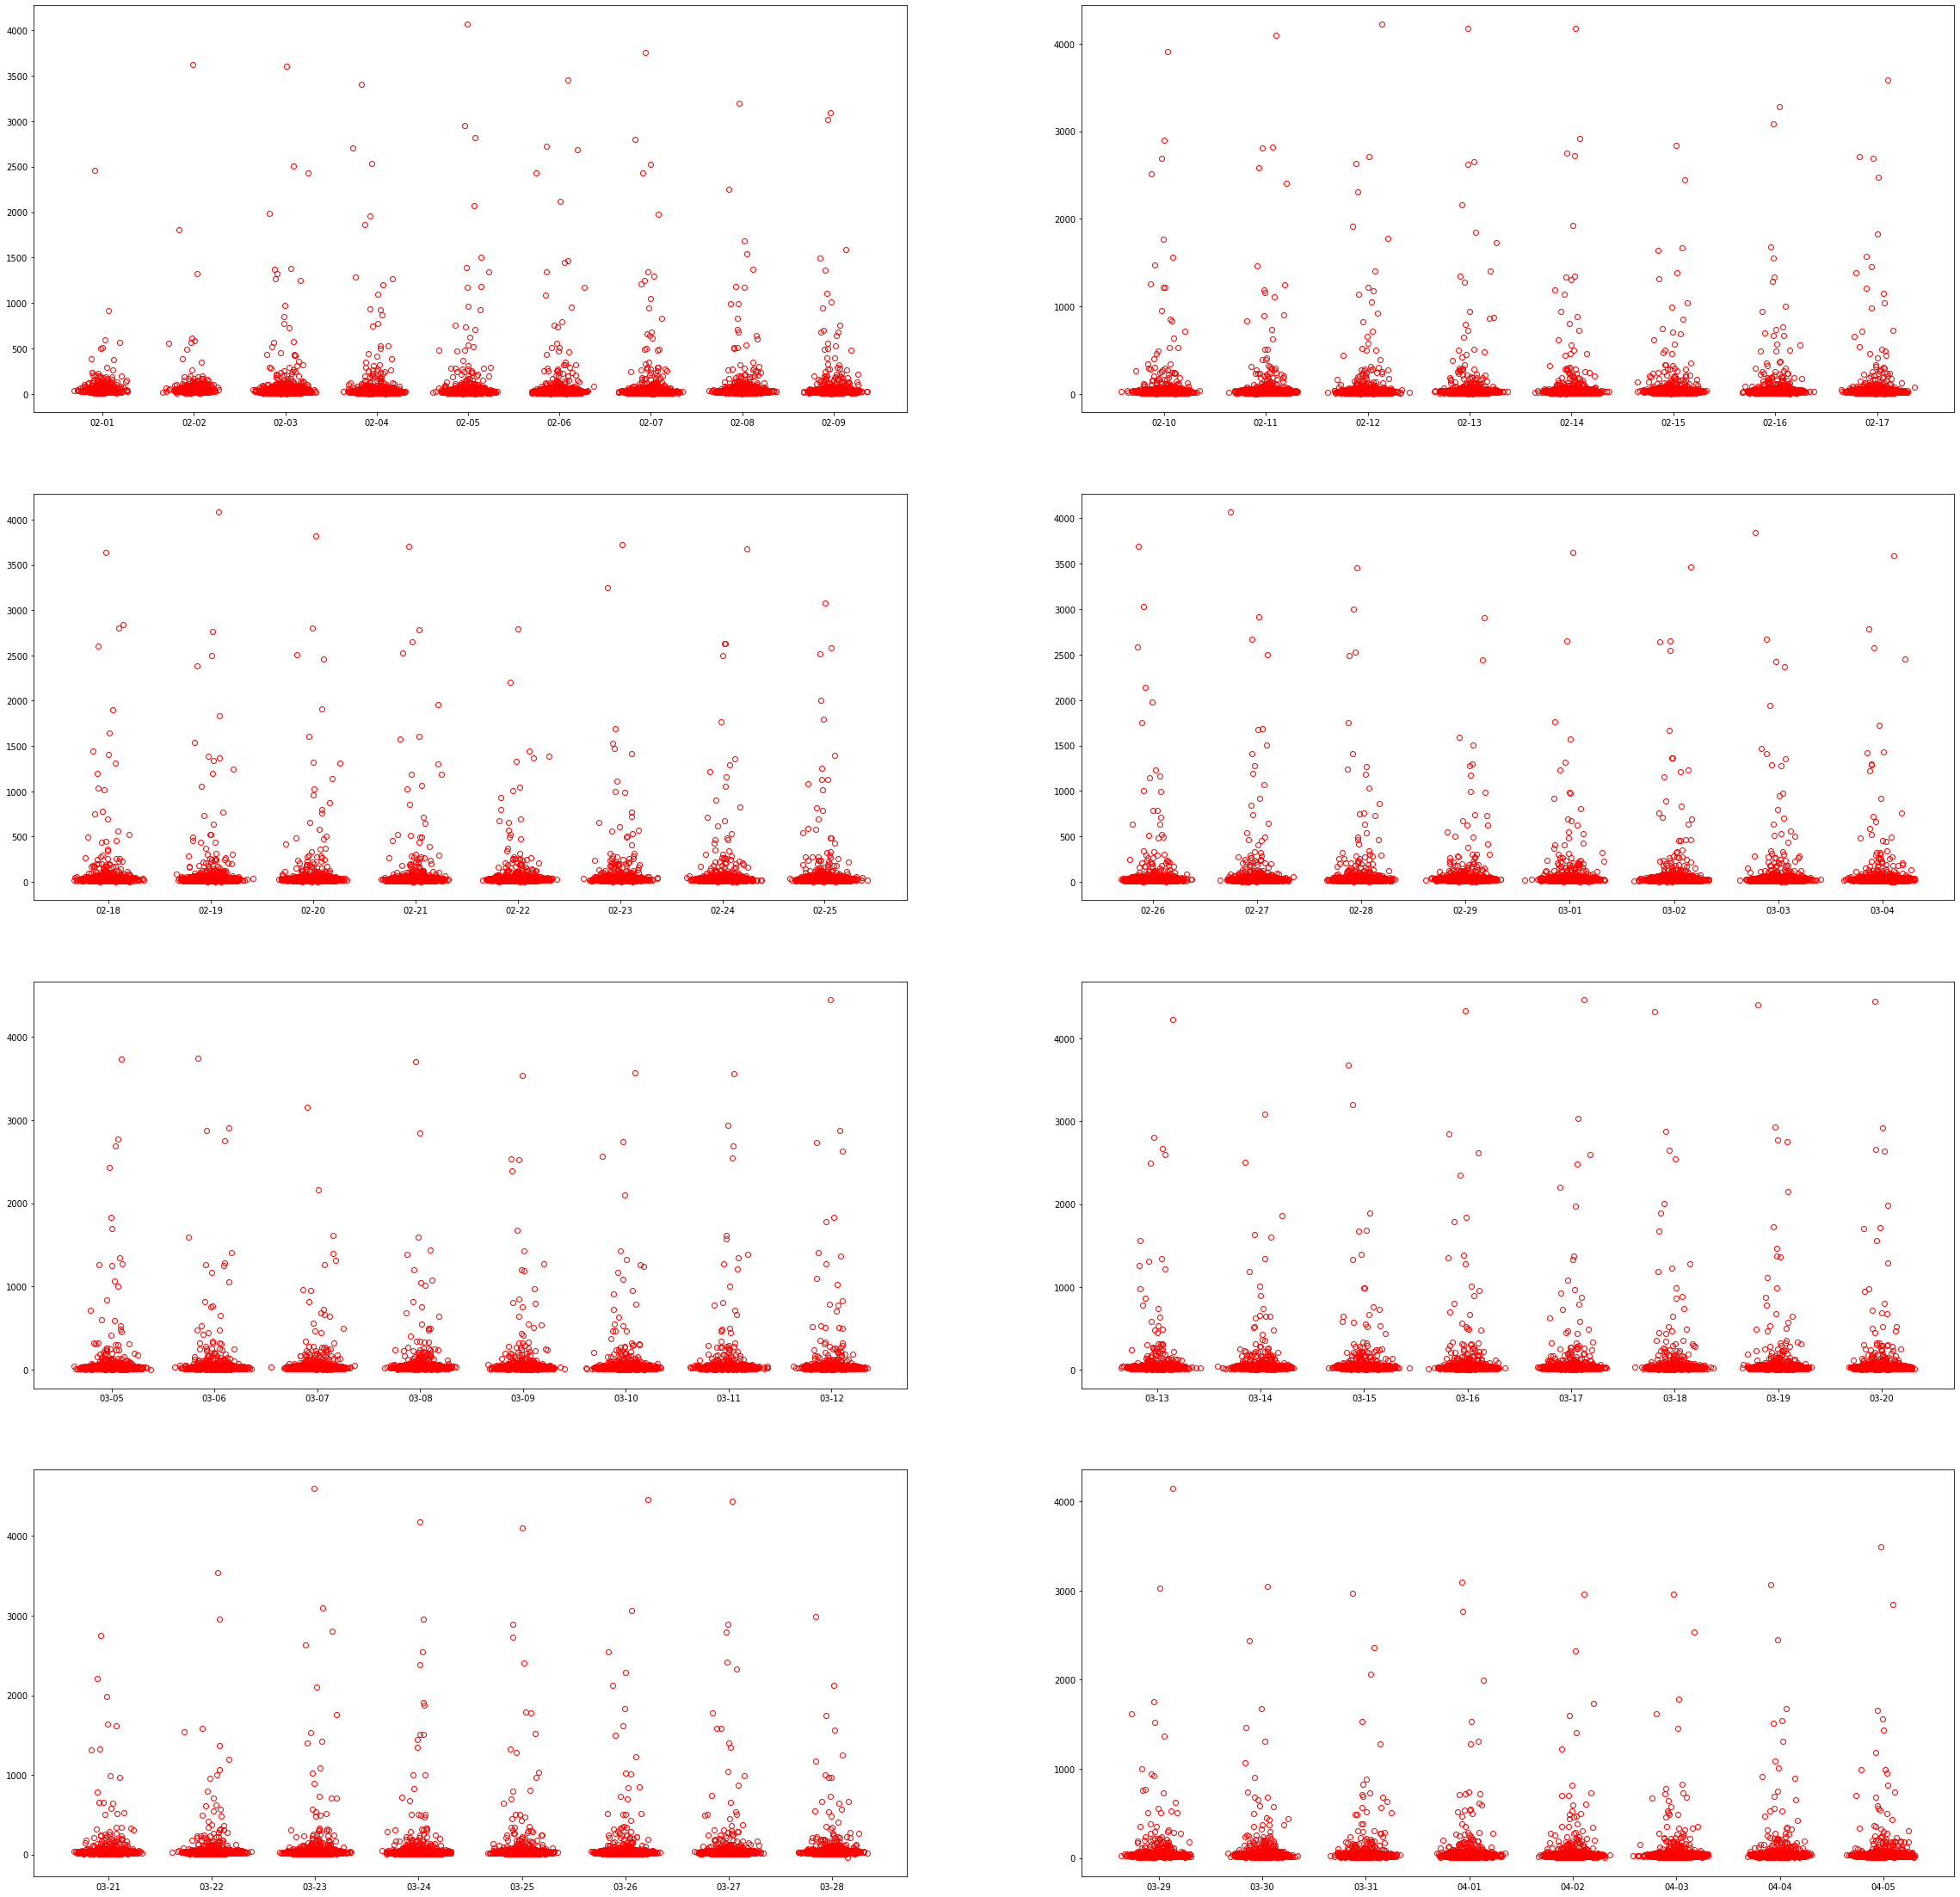

In [21]:
#Converting Hast from strings to float
df_speed_muni.Hast = pd.to_numeric(df_speed_muni.Hast)

#Creating a range of numbers representing each data
x_range = range(len(df_speed_muni.Date.unique()))
all_dates = df_speed_muni.Date.to_numpy() #getting all the dates to list format
dates = np.unique(all_dates) #get a unique set using set and afterwards convert to list and sort
#dates = np.sort(dates)

x_axis_dict = dict(zip(dates,x_range)) # Create a dictionary to transform each date to a representing number

x_axis = [x_axis_dict[date] for date in all_dates] # Transform dates to numbers

#This way noise can be added to each x-axis point
length = len(x_axis)
noise = np.random.randn(length,1)*0.1

lst = [[x,y] for x,y in zip(x_axis,df_speed_muni.Hast)]

lst.sort()

jitter = [[lst[i][0] + noise[i],lst[i][1]] for i in range(len(noise))]

fig = plt.figure(figsize=(40,40))

x = np.array([j[0] for j in jitter]).squeeze()
y = np.array([j[1] for j in jitter])

assert len(x) == len(y)

split = int(len(x)/8)

days = [str(day)[5:10] for day in df_speed_muni.Date.unique()]

n,m = 0,split
mini = -0.5
for i in range(8):
    maxi = 8*(i+1)+0.5
    mask = (x < maxi) & (x > mini)
    x_axis = x[mask]
    y_axis = y[mask]
    
    ax = fig.add_subplot(4,2,i+1)
    ax.plot(x_axis,y_axis,'ro',fillstyle='none')
    
    x_max = int(maxi-0.5)+1
    x_min = int(mini+0.5)
    
    ax.set_xticks(range(x_min,x_max))
    ax.set_xticklabels(days[x_min:x_max])
    
    mini = maxi

There is a lot of outliers there simply cant be right. Busses are maximum allowed to drive 80 km/h on motorways and assuming they sometimes drive up to 10 km/t more than they are allowed, for that reason all over 90 km/h is removed from the dataset.

In [22]:
df_speed_muni = df_speed_muni[(df_speed_muni.Hast <= 90) & (df_speed_muni.Hast >= 0)]

Next, the data becomes checked again via a jitter plot. 

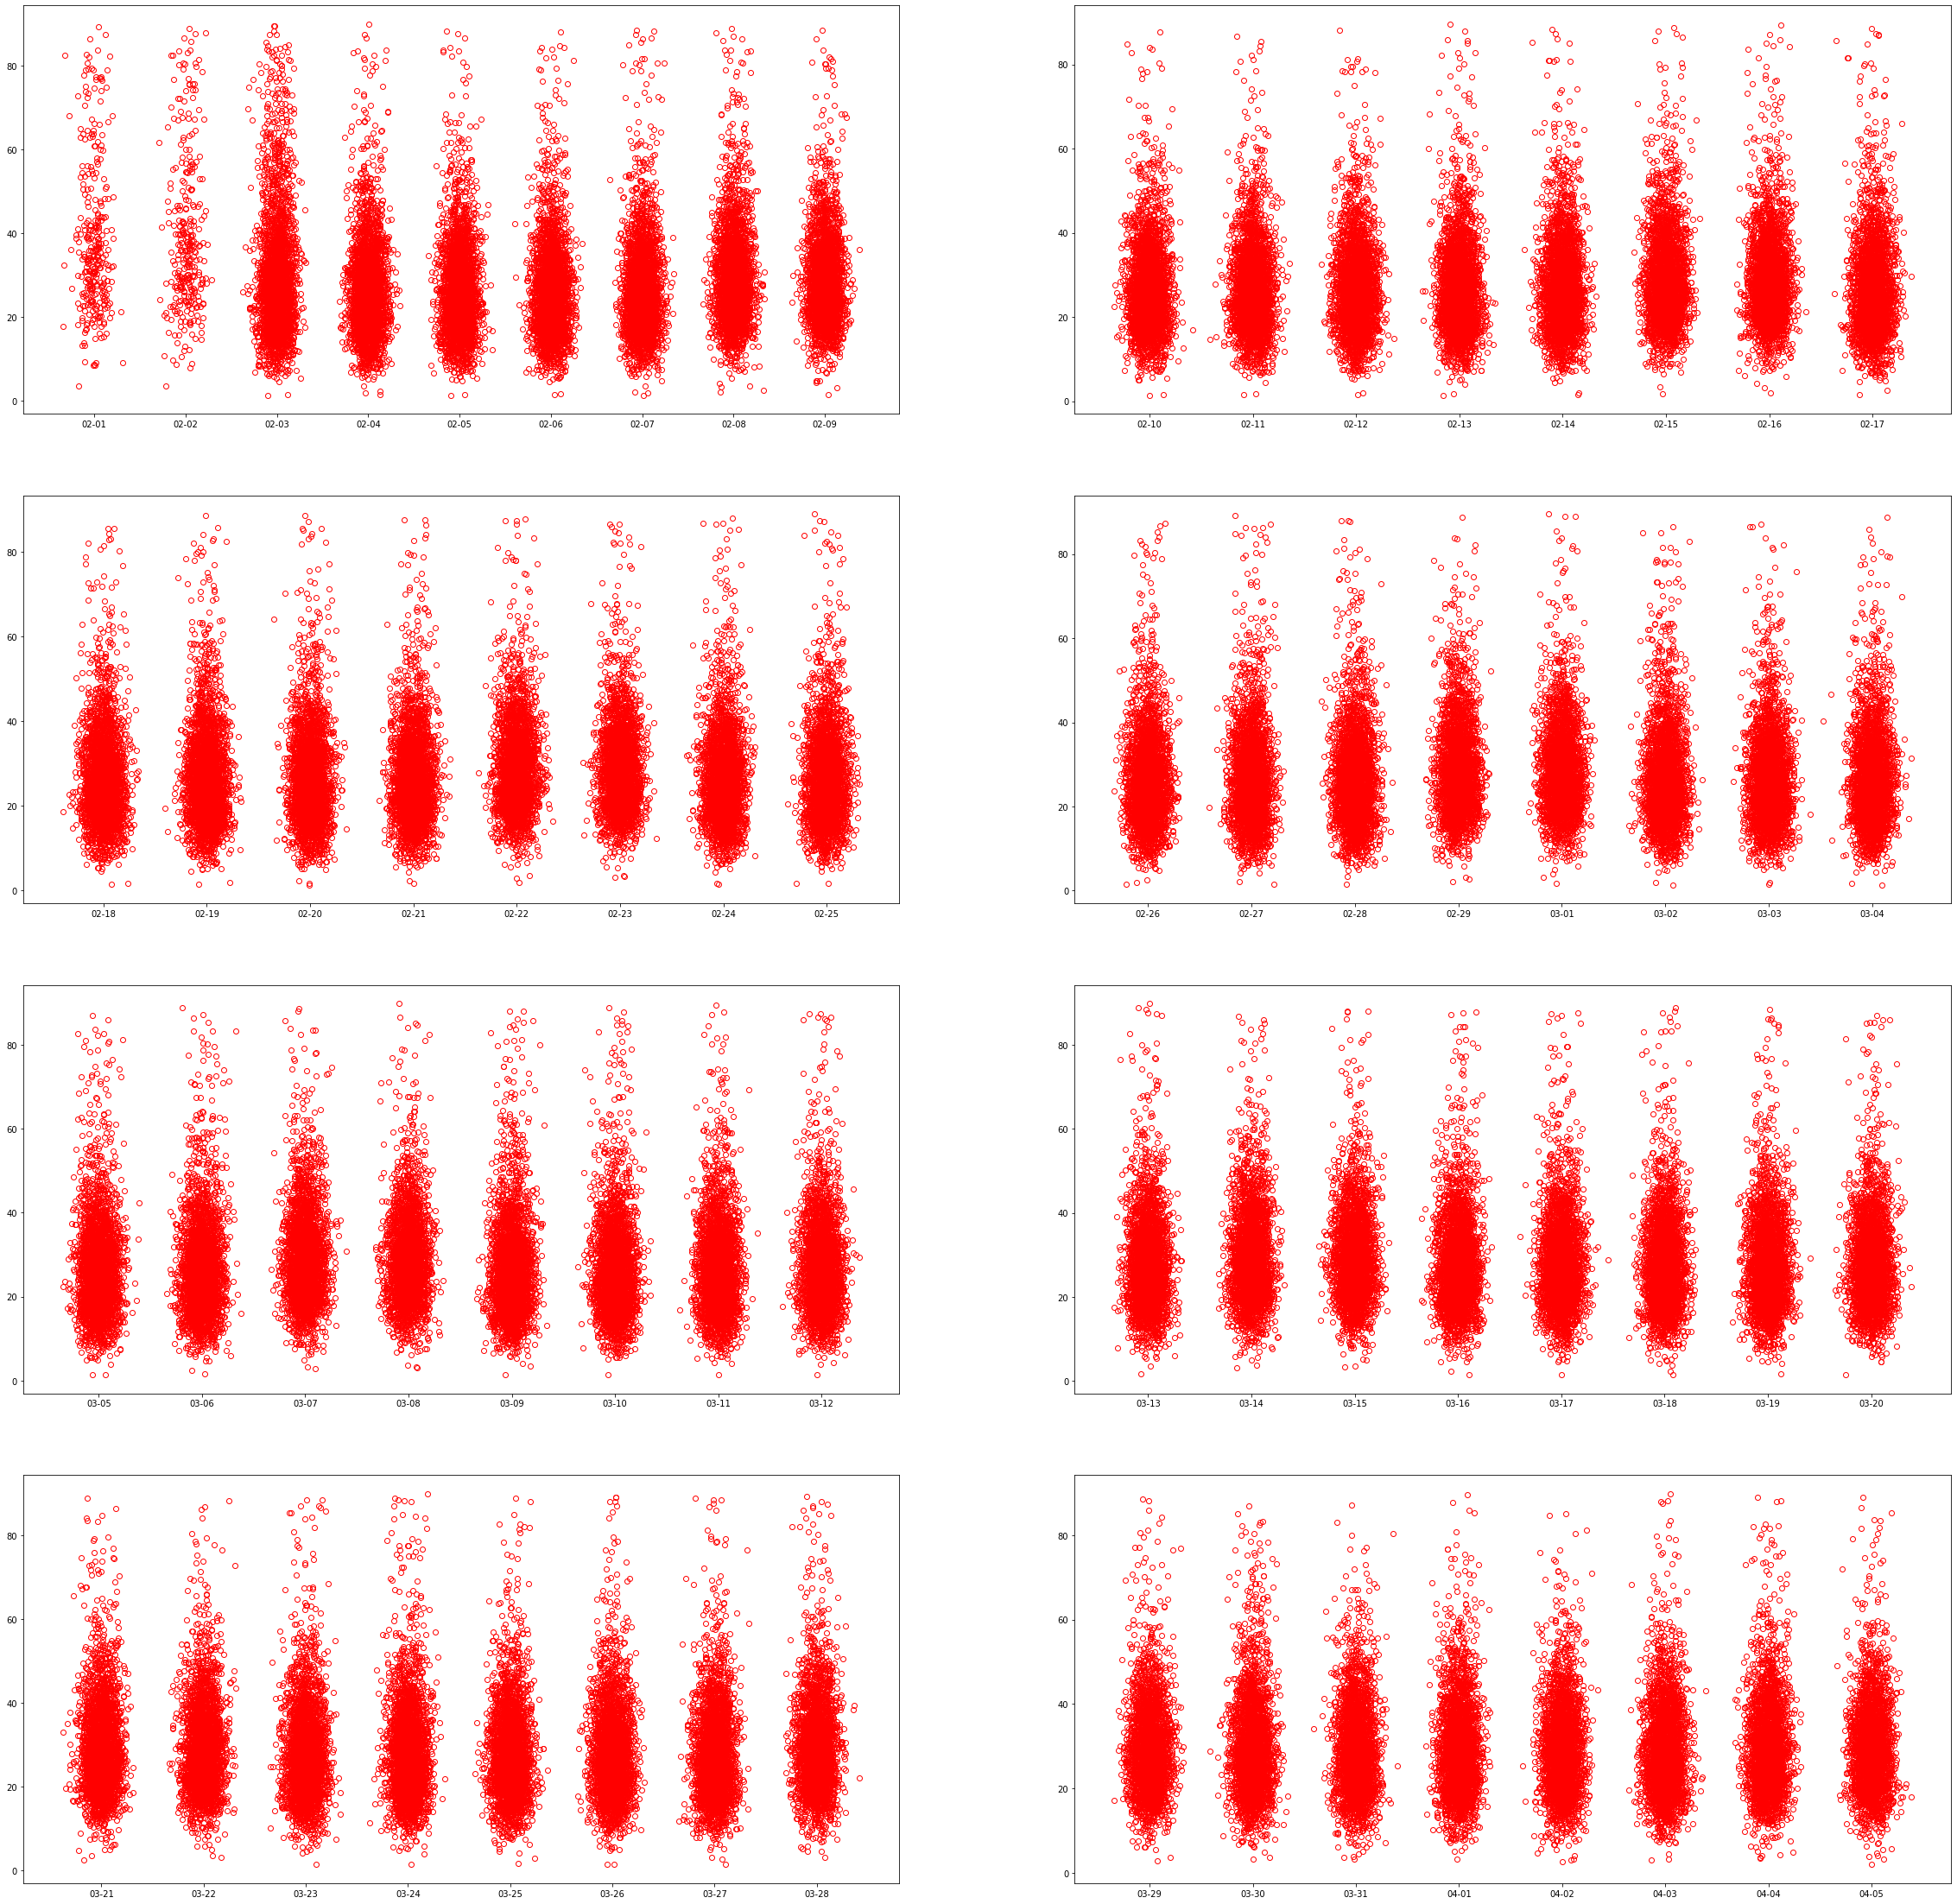

In [23]:
#Converting Hast from strings to float
df_speed_muni.Hast = pd.to_numeric(df_speed_muni.Hast)

#Creating a range of numbers representing each data
x_range = range(len(df_speed_muni.Date.unique()))
all_dates = df_speed_muni.Date.to_numpy() #getting all the dates to list format
dates = np.unique(all_dates) #get a unique set using set and afterwards convert to list and sort
#dates = np.sort(dates)

x_axis_dict = dict(zip(dates,x_range)) # Create a dictionary to transform each date to a representing number

x_axis = [x_axis_dict[date] for date in all_dates] # Transform dates to numbers

#This way noise can be added to each x-axis point
length = len(x_axis)
noise = np.random.randn(length,1)*0.1

lst = [[x,y] for x,y in zip(x_axis,df_speed_muni.Hast)]

lst.sort()

jitter = [[lst[i][0] + noise[i],lst[i][1]] for i in range(len(noise))]

fig = plt.figure(figsize=(40,40))

x = np.array([j[0] for j in jitter]).squeeze()
y = np.array([j[1] for j in jitter])

assert len(x) == len(y)

split = int(len(x)/8)

days = [str(day)[5:10] for day in df_speed_muni.Date.unique()]

n,m = 0,split
mini = -0.5
for i in range(8):
    maxi = 8*(i+1)+0.5
    mask = (x < maxi) & (x > mini)
    x_axis = x[mask]
    y_axis = y[mask]
    
    ax = fig.add_subplot(4,2,i+1)
    ax.plot(x_axis,y_axis,'ro',fillstyle='none')
    
    x_max = int(maxi-0.5)+1
    x_min = int(mini+0.5)
    
    ax.set_xticks(range(x_min,x_max))
    ax.set_xticklabels(days[x_min:x_max])
    
    mini = maxi

It seems the first two days don't have the same amount of data points which probably will make the average speed greater for these two days.  

In [24]:
df_speed_muni.groupby("Date").mean().head(10)

,Hast
Date,
2020-02-01,38.956879
2020-02-02,39.809529
2020-02-03,29.513333
2020-02-04,26.393124
2020-02-05,26.214692
2020-02-06,26.171430
2020-02-07,26.349251
2020-02-08,29.439255
2020-02-09,28.927483


Yes, that seems to be the case so these two day will be removed 

In [25]:
df_speed_muni = df_speed_muni[df_speed_muni.Date > "2020-02-03"]

Next we will try to understand the overall distribution of speed measurements

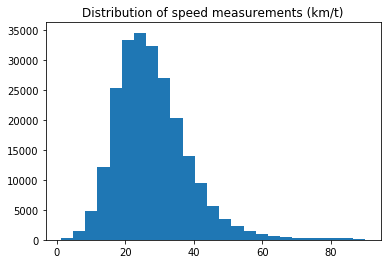

In [26]:
plt.hist(df_speed_muni.Hast,bins=25)
plt.title("Distribution of speed measurements (km/t)")
plt.show()

The distribution seems to be slightly right-scewed but it is very close to being normally distributed so we choose to use the mean as measurement. However, to be sure it is probably a good idea to check that each day seems to be symmetrically distributed. We use a boxplot for this. 

<Figure size 2880x2880 with 0 Axes>

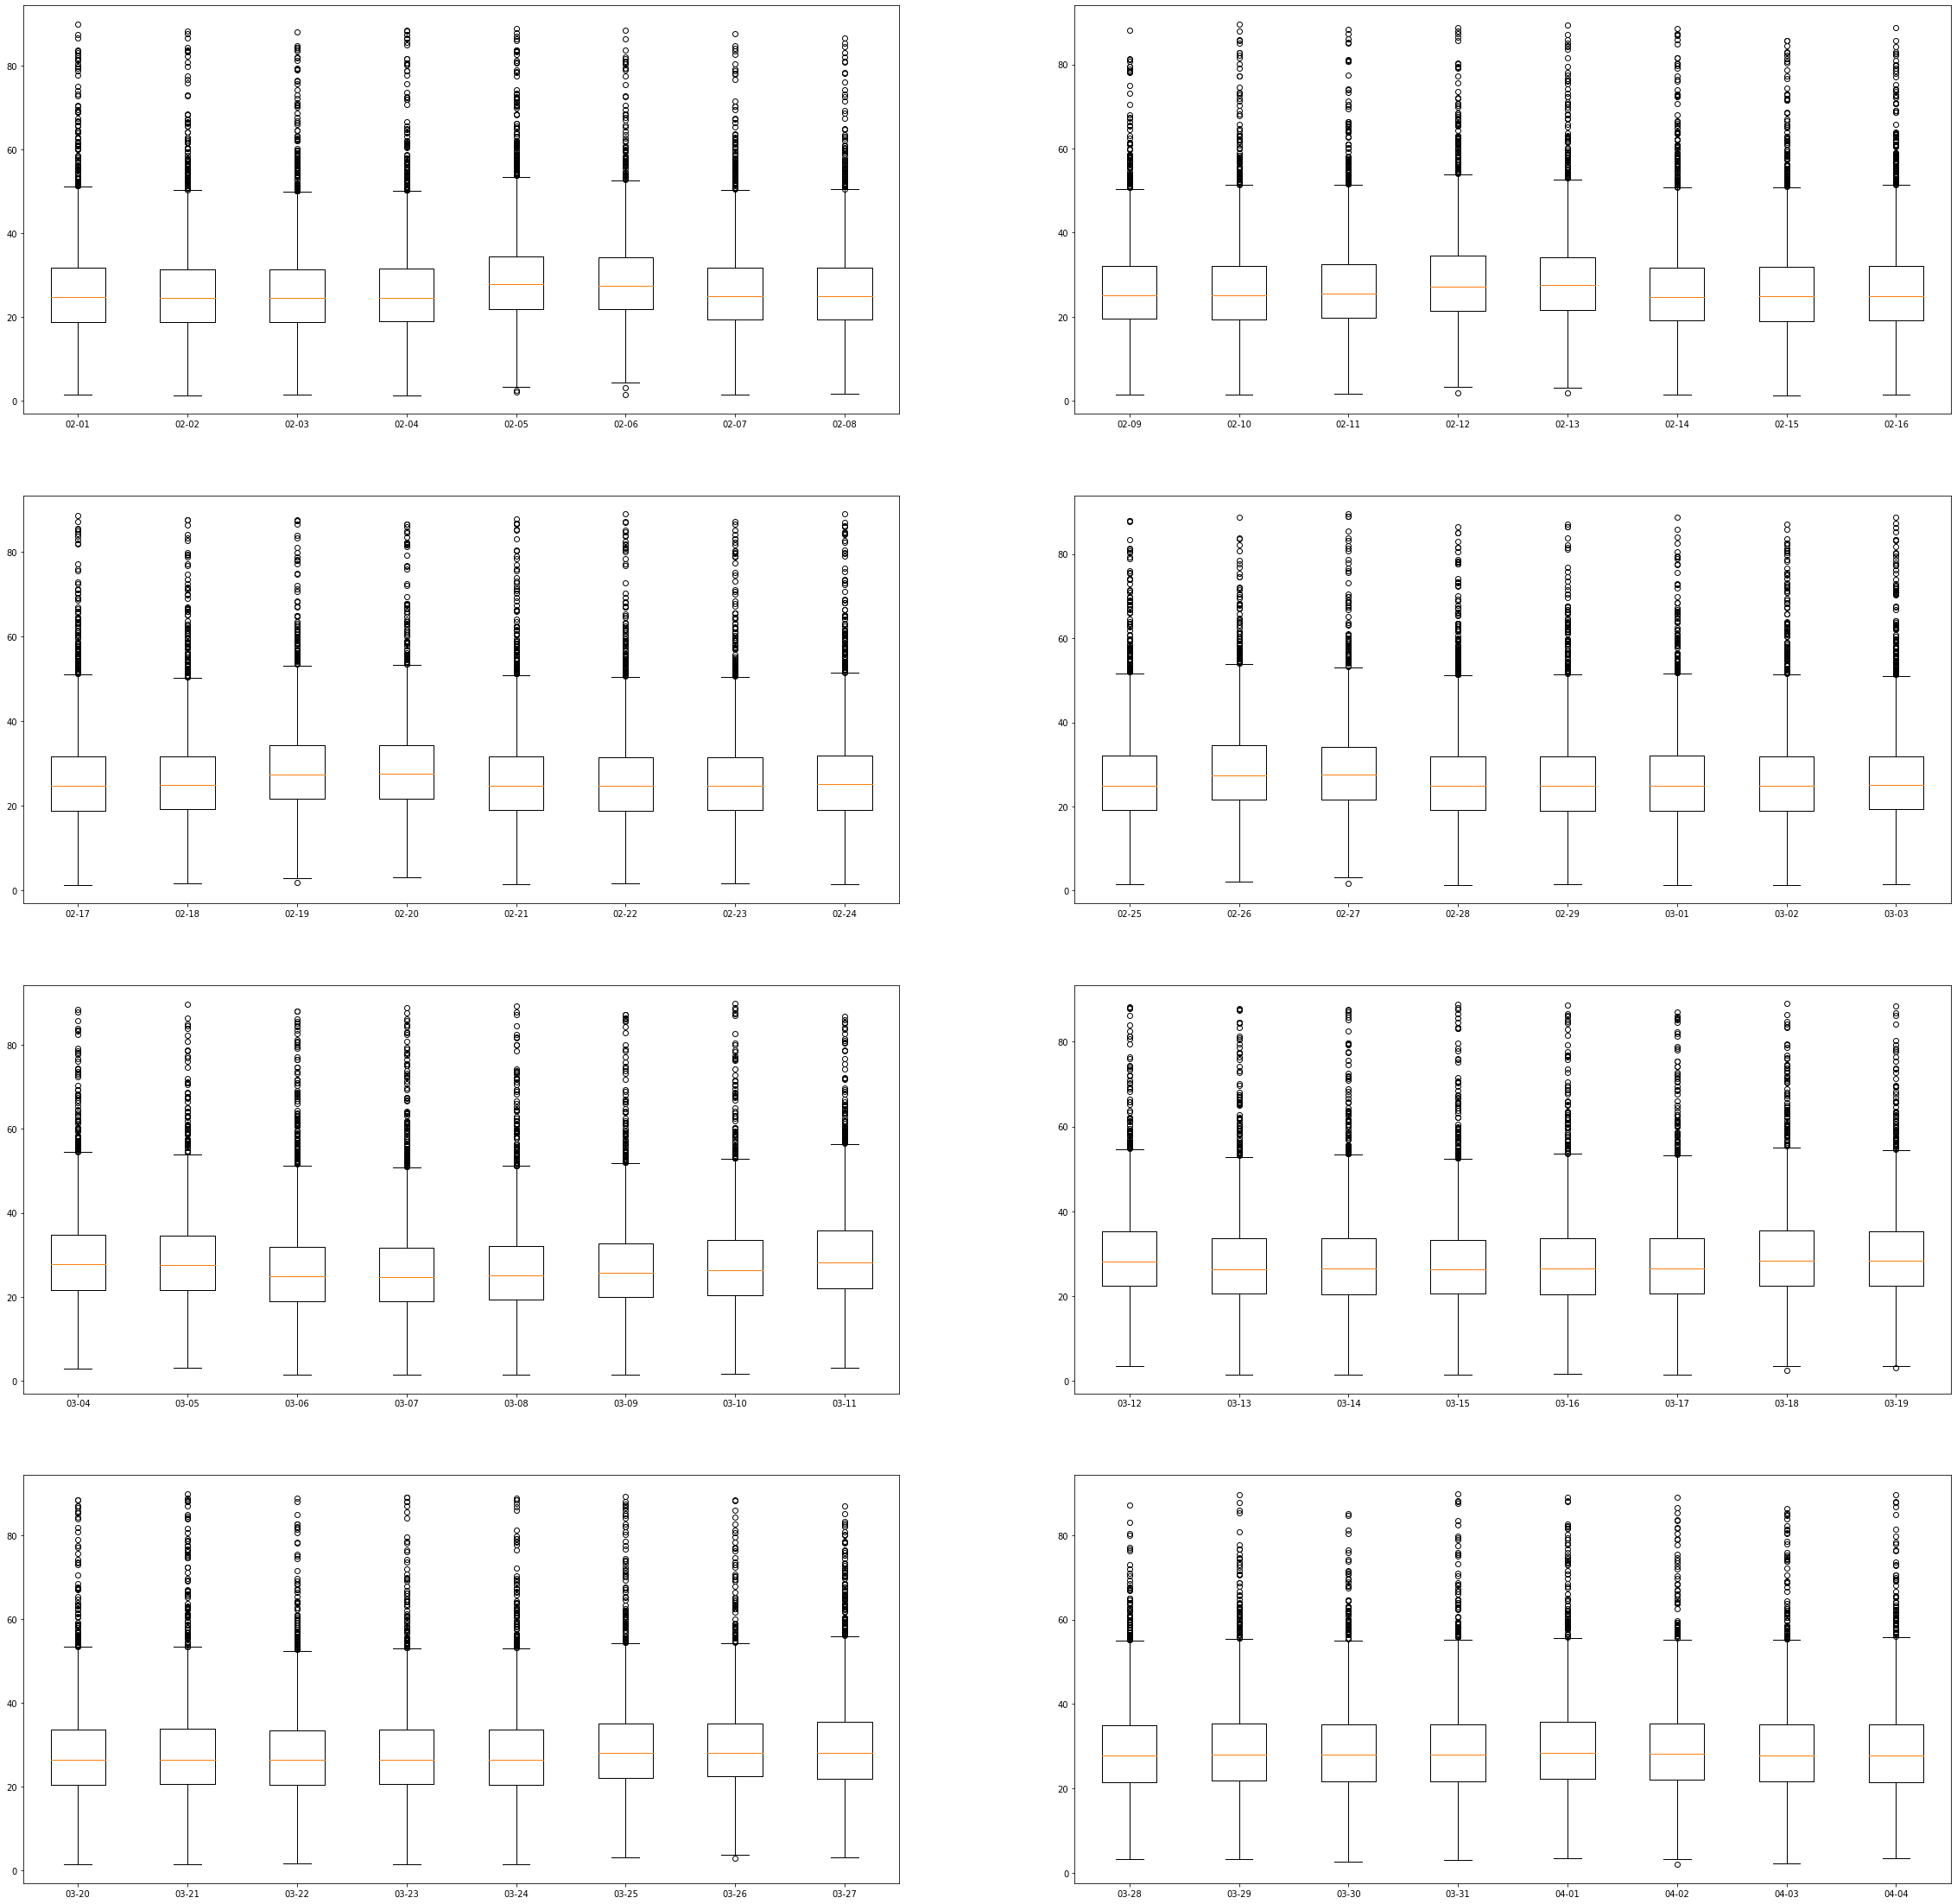

In [27]:
#Creating a range of numbers representing each data
x_range = range(len(df_speed_muni.Date.unique()))
all_dates = df_speed_muni.Date.to_numpy() #getting all the dates to list format
dates = np.unique(all_dates) #get a unique set using set and afterwards convert to list and sort
#dates = np.sort(dates)

x_axis_dict = dict(zip(dates,x_range)) # Create a dictionary to transform each date to a representing number

x_axis = [x_axis_dict[date] for date in all_dates] # Transform dates to numbers

#This way noise can be added to each x-axis point
length = len(x_axis)
noise = np.random.randn(length,1)*0.1

lst = [[x,y] for x,y in zip(x_axis,df_speed_muni.Hast)]

lst.sort()

jitter = [[lst[i][0]] for i in range(len(noise))]

fig = plt.figure(figsize=(40,40))

x = np.array([l[0] for l in lst]).squeeze()
y = np.array([l[1] for l in lst])

mini = -0.5
boxplot = []
for i in range(int(max(x_axis))):
    maxi = i + 0.5
    mask = (x < maxi) & (x > mini)
    y_axis = y[mask]
    
    mini = maxi
    
    boxplot += [y_axis]

fig = plt.figure(figsize=(40,40))

mini = 0
for i in range(8):
    maxi = (i+1)*8
    ax = fig.add_subplot(4,2,i+1)
    ax.boxplot(boxplot[mini:maxi])
    
    x_max = int(maxi-0.5)+1
    x_min = int(mini+0.5)
    
    ax.set_xticks(range(1,9))
    ax.set_xticklabels(days[x_min:x_max])
    
    mini = maxi
    

plt.show()

All the days seems to follow the same distribution pattern with being slightly right-skewed as the histogram

Finally, the average speed measured per day is extracted across all municipalities

In [28]:
df_all_speed = df_speed_muni.groupby(["Date"]).mean()

df_all_speed = df_all_speed.reset_index()

day_dict = dict(zip(range(8),["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]))

day_names = [day_dict[d] for d in df_all_speed.Date.dt.dayofweek]

df_all_speed["DayOfWeek"] = day_names

#___________________________________________________________________________________________
df_speed_mun = df_speed_muni.groupby(["Kommune","Date"]).mean()
df_speed_mun = df_speed_mun.unstack()['Hast'].transpose()

df_speed_mun = df_speed_mun.reset_index()

#df_speed_mun = dict(zip(range(8),["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]))

#day_names = [day_dict[d] for d in df_all_speed.Date.dt.dayofweek]

#df_speed_mun["DayOfWeek"] = day_names


In [29]:
df_speed_mun = df_speed_mun.set_index("Date")
before_lockdown = df_speed_mun[df_speed_mun.index < "2020-03-11"]
before_lockdown = pd.DataFrame(before_lockdown.mean(),columns=["avg_speed_feb"])
before_lockdown = before_lockdown.reset_index()
before_lockdown = before_lockdown.rename(columns={"index":"Kommune"})

after_lockdown = df_speed_mun[df_speed_mun.index >= "2020-03-11"]
after_lockdown = pd.DataFrame(after_lockdown.mean(),columns=["avg_speed_mar"])
after_lockdown = after_lockdown.reset_index()
after_lockdown = after_lockdown.rename(columns={"index":"Kommune"})

avg_speed = before_lockdown.merge(after_lockdown,on="Kommune")
avg_speed = avg_speed.set_index("Kommune")

avg_speed["per_increase"] = ((avg_speed.avg_speed_mar-avg_speed.avg_speed_feb)/avg_speed.avg_speed_feb)*100


df_avg_hast_pre_lockdown = df_speed_mun[df_speed_mun.index < "2020-03-11"].mean(0)

df_avg_hast_post_lockdown = df_speed_mun[df_speed_mun.index >= "2020-03-11"].mean(0)

df_hast_change = pd.DataFrame((df_avg_hast_post_lockdown - df_avg_hast_pre_lockdown)/df_avg_hast_pre_lockdown,
                             columns=["pct_increase"])


In [30]:
df_hast_change

,pct_increase
Kommune,
Albertslund,0.050242
Ballerup,0.061674
Brøndby,0.067695
Dragør,0.044120
Frederiksberg,0.084431
Gentofte,0.042431
Gladsaxe,0.053064
Glostrup,0.066348
Herlev,0.058592


In [31]:
###### Calculating percentagechange in speed ######################################
df_avg_hast_pre_lockdown = df_speed_mun[df_speed_mun.index < "2020-03-11"].mean(0)

df_avg_hast_post_lockdown = df_speed_mun[df_speed_mun.index >= "2020-03-11"].mean(0)

df_hast_change = pd.DataFrame((df_avg_hast_post_lockdown - df_avg_hast_pre_lockdown)/df_avg_hast_pre_lockdown,
                             columns=["pct_increase"])

df_hast_change = df_hast_change.sort_index()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

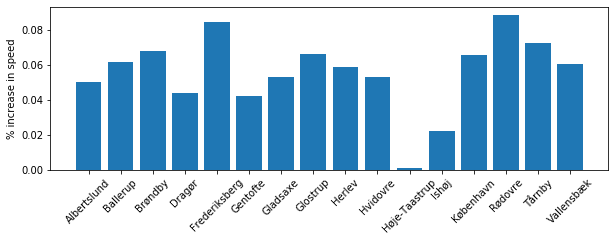

In [32]:
plt.figure(figsize=(10,3))

plt.bar(df_hast_change.index,df_hast_change.pct_increase)
plt.ylabel("% increase in speed")
plt.xticks(rotation=45)

#### 4.1.2 Preprocessing and cleaning: Geo dataset
The code cell below extracts the geo data relevent for the focus municipalities. 

The file 'KOMMUNE.json' was a shapefile converted geojson format by this [website](https://www.statsilk.com/maps/convert-esri-shapefile-map-geojson-format). This is because the folium library only can handle geojson files. 

Afterwards, all municipalities that not were in focus were removed and Frederiksberg was put in the back so it would be visible on the folium maps. 

Lastly, the coordinates were converted from UTM to WGS84 in order to make the plotting of the shapefiles correct. 

In [34]:
muns = r'KOMMUNE.json'

with open(os.path.join(path,"KOMMUNE.json")) as f:
    data = json.load(f)
    

new_data = []
mun_list = []    
for f in data['features']:
    if f["properties"]["KOMNAVN"] in focus_municipality:
        mun = f["properties"]["KOMNAVN"]
        
        if mun != "Frederiksberg":
            new_data += [f]
        else:
            frederiksberg = f
new_data += [frederiksberg]
   
new_data = {"type":"FeatureCollection","features":new_data}

with open(os.path.join(path,"big_cph.json"), 'w') as fp:
    json.dump(new_data, fp)
    
with open(os.path.join(path,"big_cph.json")) as f:
    big_cph = json.load(f)

p = Proj(proj='utm',zone=32,ellps='WGS84', preserve_units=True)


for j,f in enumerate(big_cph["features"]):
    for i,c1 in enumerate(f["geometry"]["coordinates"][0]):
        x1,y1 = c1
        x2, y2 = p(x1,y1,inverse=True)
        
        big_cph["features"][j]["geometry"]["coordinates"][0][i] = [x2,y2]
        
with open(os.path.join(path,"big_cph_lon_lat.json"), 'w') as fp:
    json.dump(big_cph, fp)
    
with open(os.path.join(path,"big_cph_lon_lat.json")) as f:
    big_cph = json.load(f)

#### 4.1.3 Preprocessing and cleaning: Passengers dataset
The following code cell performs the necessary cleaning and preprocessing of passenger data set presented in Section 3.1.3, in order to extract data about the average number on- and off bording passengers in the focus municipalities, in each periodes.

First the raw data set was printed out to get an understanding. Notice, that there are many NaN values where some of them are mistakes while others are because the line has been dropped or a new line has been made.  

In [35]:
df_passenger

,Kommune,Stopnr,Linje,Retn.,Stopnavn,På_201902,Af_201902,På_201903,Af_201903,På_202002,Af_202002,På_202003,Af_202003
0,Rødovre,100.0,200S,1.0,Fortvej,74.0,49.0,100.0,96.0,122.0,42.0,46.0,23.0
1,Tårnby,1000.0,34,1.0,Amagerhallen,0.0,38.0,11.0,7.0,1.0,18.0,0.0,8.0
2,København,10004.0,26,1.0,Langeliniekaj (Midt),6.0,37.0,3.0,32.0,NaN,NaN,NaN,NaN
3,København,10004.0,27,1.0,Langeliniekaj (Midt),NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,København,10004.0,27,2.0,Langeliniekaj (Midt),NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14360,Roskilde,9991.0,220,1.0,Klosterengen,6.0,6.0,6.0,4.0,4.0,5.0,3.0,7.0
14361,Roskilde,9992.0,220,1.0,Ternehaven,9.0,11.0,3.0,12.0,5.0,10.0,7.0,6.0
14362,Roskilde,9993.0,220,1.0,Solvænget,5.0,13.0,3.0,8.0,4.0,10.0,6.0,6.0
14363,Roskilde,9994.0,220,1.0,Hejrevej,3.0,1.0,2.0,4.0,2.0,8.0,5.0,7.0


The NaN values needs to be removed but it is not possible to delete the lines with NaN values because then useful information will be deleted. Therefore, the dataset will be split in 4 parts and the NaN values can be dropped. 

In [36]:
# splitting the data and remove rows with NA values
df_passenger_201902 = df_passenger[["Kommune","På_201902","Af_201902"]].dropna()
df_passenger_201903 = df_passenger[["Kommune","På_201903","Af_201903"]].dropna()
df_passenger_202002 = df_passenger[["Kommune","På_202002","Af_202002"]].dropna()
df_passenger_202003 = df_passenger[["Kommune","På_202003","Af_202003"]].dropna()

In the deletion of some of the rows it is possible that there have been removed many stops at one dataframe so lets check if it seems to be equal. 

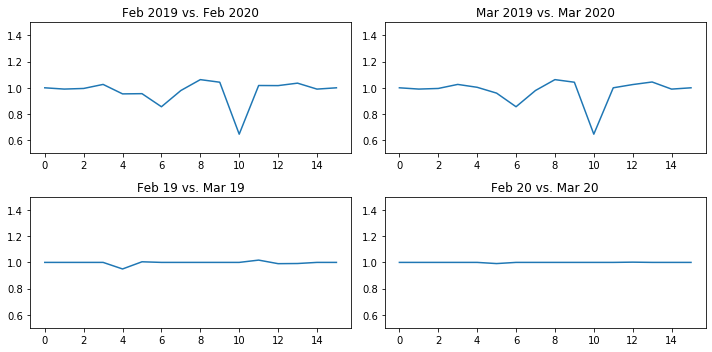

In [37]:
#Checking if there is the same amount of stops per municipality between february 2020 and march 2020

feb19 = np.array([df_passenger_201902[df_passenger_201902.Kommune.isin(focus_municipality)].groupby("Kommune").size()])
mar19 = np.array([df_passenger_201903[df_passenger_201903.Kommune.isin(focus_municipality)].groupby("Kommune").size()])
feb20 = np.array([df_passenger_202002[df_passenger_202002.Kommune.isin(focus_municipality)].groupby("Kommune").size()])
mar20 = np.array(df_passenger_202003[df_passenger_202003.Kommune.isin(focus_municipality)].groupby("Kommune").size())

fig = plt.figure(figsize=(10,5))

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

ax1.plot((feb19/feb20).squeeze())
ax2.plot((mar19/mar20).squeeze())
ax3.plot((feb19/mar19).squeeze())
ax4.plot((mar20/feb20).squeeze())

ax1.title.set_text("Feb 2019 vs. Feb 2020")
ax2.title.set_text("Mar 2019 vs. Mar 2020")
ax3.title.set_text("Feb 19 vs. Mar 19")
ax4.title.set_text("Feb 20 vs. Mar 20")

ax1.set_ylim(0.5,1.5)
ax2.set_ylim(0.5,1.5)
ax3.set_ylim(0.5,1.5)
ax4.set_ylim(0.5,1.5)

plt.tight_layout()
plt.show()



It seems we need to be careful comparing the two years with each other because there not are the same amount of stops. There is however the same (or close to) amount of stops between months in both years so they are more safe to compare. The different in stops has probably something to do with the new metro which in our case makes the years incomparable. 

Next, we get an understanding of the underlying distribution

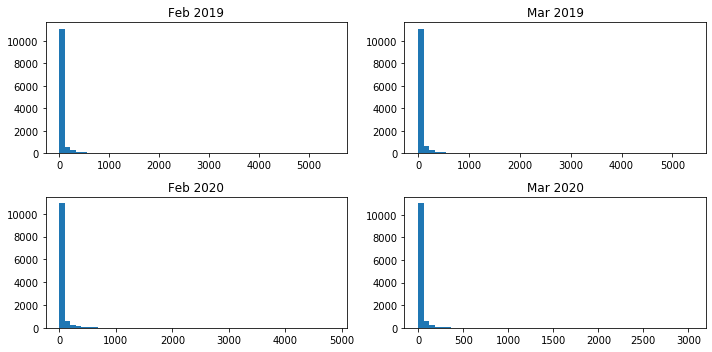

In [38]:
plt.figure(figsize=(10,5))

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)


ax1.hist(df_passenger_201902.På_201902,bins=50)
ax2.hist(df_passenger_201903.På_201903,bins=50)
ax3.hist(df_passenger_202002.På_202002,bins=50)
ax4.hist(df_passenger_202003.På_202003,bins=50)

ax1.title.set_text("Feb 2019")
ax2.title.set_text("Mar 2019")
ax3.title.set_text("Feb 2020")
ax4.title.set_text("Mar 2020")

plt.tight_layout()
plt.show()

All the distributions are strongly rightly skewed! We try to figure out if it is a mistake by seeing which stops are over 1500. 

In [39]:
df_passenger[df_passenger.På_202002 >= 1500]

,Kommune,Stopnr,Linje,Retn.,Stopnavn,På_201902,Af_201902,På_201903,Af_201903,På_202002,Af_202002,På_202003,Af_202003
540,København,10843.0,2A,1.0,"Hovedbanegården, Tivoli",1886.0,1032.0,2044.0,998.0,1669.0,857.0,862.0,439.0
541,København,10843.0,5C,1.0,"Hovedbanegården, Tivoli",3901.0,1251.0,3793.0,1219.0,3660.0,1198.0,1889.0,666.0
542,København,10843.0,7A,1.0,"Hovedbanegården, Tivoli",NaN,NaN,NaN,NaN,1891.0,547.0,1035.0,339.0
546,København,10844.0,5C,2.0,"Hovedbanegården, Tivoli",1909.0,3865.0,1840.0,3930.0,1743.0,3797.0,915.0,1889.0
2500,København,2151.0,5C,1.0,Nørrebro st.,2223.0,1739.0,2368.0,1863.0,2067.0,2868.0,951.0,1504.0
2513,København,2160.0,5C,2.0,Nørrebro st.,1889.0,2249.0,1870.0,2261.0,2992.0,2001.0,1809.0,1222.0
3414,København,27527.0,5C,1.0,Amagerbro st.,1377.0,929.0,1521.0,858.0,1720.0,850.0,847.0,471.0
7598,København,50460.0,150S,2.0,Nørreport st.,4029.0,10.0,3809.0,1.0,2666.0,1.0,1409.0,3.0
7603,København,50460.0,6A,1.0,Nørreport st.,4573.0,810.0,5022.0,752.0,4842.0,1.0,3039.0,0.0
7606,København,50461.0,5C,2.0,Nørreport st.,5476.0,841.0,5384.0,777.0,4394.0,1008.0,2217.0,533.0


The places that in average are more than 1500 passengers per day are Hovedbanegården, Nørrebro, Amagerbro and Nørreport. That does not seem to be unrealistic. 

Even though the distribution it very skewed and the median therefore arguably is the better measure, we choose to take the mean because we would like the decrease in places like Nørreport and Hovedbanegården to be visible in the numbers. This will not be the case if we took the median but would be the case if we took the mean. 

In [40]:
# Compute the average number of passengers in the focus municipality
df_pass = df_passenger_201902.groupby(["Kommune"]).mean().loc[focus_municipality]
df_pass = df_pass.join(df_passenger_201903.groupby(["Kommune"]).mean().loc[focus_municipality],
                                 on="Kommune")
df_pass = df_pass.join(df_passenger_202002.groupby(["Kommune"]).mean().loc[focus_municipality],
                                 on="Kommune")
df_pass = df_pass.join(df_passenger_202003.groupby(["Kommune"]).mean().loc[focus_municipality],
                                 on="Kommune")

We calculate the percentage of passengers in march compared to february for 2019 and 2020 as well as the percentage drop in passengers from february 2020 to march 2020. 

In [41]:
df_pass_diff = pd.DataFrame()

df_pass_diff["per_2019"] = (df_pass.På_201903).div(df_pass.På_201902)*100

df_pass_diff["per_2020"] = (df_pass.På_202003).div(df_pass.På_202002)*100

df_pass_diff["pct_drop_2020"] = ((df_pass.På_202002)-(df_pass.På_202003))/(df_pass.På_202002)

#### 4.1.4 Preproceing and cleaning: Age dataset
The code cell below, is using the "age dataset" to calculate the median age in each of the focus municipalities. The median is usually the default statistic for age as explained [here](https://stats.stackexchange.com/questions/2547/why-is-median-age-a-better-statistic-than-mean-age). 

In [42]:
# Make age column to integer
def ageInt(x):
    return (int(x.split()[0]))

df_age_dist['Age'] = df_age_dist['Age'].apply(ageInt)

In [43]:
df_median_age = df_age_dist[df_age_dist['Municipality'].isin(focus_municipality)]
df_median_age = df_median_age.sort_values(['Municipality','Age'])
focus_municipality.sort()

median_ages = []
for m in focus_municipality:
    df_tmp = df_median_age[df_median_age['Municipality']== m]
    median_num = np.round(sum(df_tmp['Number'].values)/2)
    count = 0
    for a in np.unique(df_tmp['Age']):
        count += df_tmp.iloc[a]['Number']
        if count >= median_num:
            median_ages.append(a)
            break

data = {'Municipality': focus_municipality,
        'Midian_age': median_ages}

df_median_age = pd.DataFrame(data, columns = ['Municipality', 'Median_age'])
df_median_age['Median_age'] = median_ages

df_median_age = df_median_age.set_index('Municipality').sort_index()

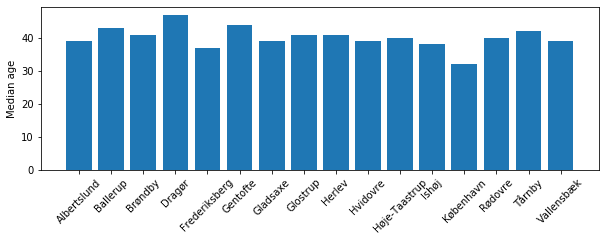

In [44]:
plt.figure(figsize=(10,3))

plt.bar(df_median_age.index,df_median_age.Median_age)
plt.ylabel("Median age")
plt.xticks(rotation=45)
plt.show()

The age difference is not as drastic as expected but it is clear that there live more young people in København and Frederiksberg which probably is due to young people studying. 

#### 4.1.5 Preprocessing and cleaning: unemployment dataset
In the code cell below, the unemployedment percentage in each of the focus municipalities is calculated. Unfortunately we could not find data that showed unemployment as a percentage for each of the focus municipalities, but only the number of unemployed in each a focus municipalities. The percentage unemployment rate is therefore calculated from the unemployment dataset and age dataset, Where it is assumed that every citizen between the ages of 25 and 67 is available to the labor market.

In [45]:
df_workforce = df_age_dist[(df_age_dist['Age'] > 24) & (df_age_dist['Age'] < 68) & df_age_dist['Municipality'].isin(focus_municipality)]
df_workforce = df_workforce.groupby('Municipality',as_index= False)[['Municipality','Number']].sum()
df_unemployment = df_unemployment[df_unemployment['Municipality'].isin(focus_municipality)]
df_unemployment  = pd.merge(df_workforce ,df_unemployment,how='inner')
df_unemployment['percent_unemp'] = df_unemployment['2020M02'].values/df_unemployment['Number'].values

df_unemployment = df_unemployment.set_index('Municipality').sort_index()

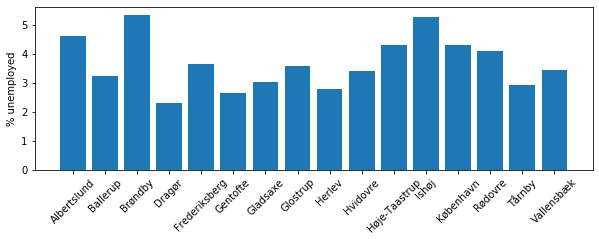

In [46]:
plt.figure(figsize=(10,3))

plt.bar(df_unemployment.index,df_unemployment.percent_unemp*100)
plt.ylabel("% unemployed")
plt.xticks(rotation=45)
plt.show()

There seems to be a quite big differences on the unemployment per municipality. 

#### 4.1.6 Preprocessing and cleaning: Ethnic dataset
In the code cell below, calculate the percentage citizens who has a non-western background, ie citizens born in a non-western country or descendant. 

In [47]:
df_ethnic = df_ethnic.loc[focus_municipality]

df_pct_ethnicity = df_ethnic[["Indvandrere fra ikke-vestlige lande","Efterkommere fra ikke-vestlige lande"]].sum(1)/df_ethnic[
    ["Personer med dansk oprindelse","Indvandrere fra vestlige lande","Efterkommere fra vestlige lande"]].sum(1)

df_ethnic = pd.DataFrame(df_pct_ethnicity,columns=["pct_not_vestern"])

df_ethnic = df_ethnic.sort_index()

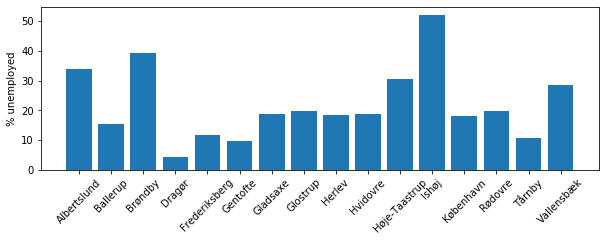

In [48]:
plt.figure(figsize=(10,3))

plt.bar(df_ethnic.index,df_ethnic.pct_not_vestern*100)
plt.ylabel("% unemployed")
plt.xticks(rotation=45)
plt.show()

There seems to be a very big difference per municipality on how many non-vestern immigrants there are. 

#### 4.1.7 Preprocessing and cleaning: Education

To make the data comparable across municipalities the percentage of people highly educated are calculated (Bachelor, Masters and PhD). In the data is primary school excluded because it is assumed most of these will be children and a municipality with many children will then automatically have a lower education level. 

In [49]:
df_education = df_education.loc[focus_municipality]
df_pct_high_education = df_education.copy()
df_pct_high_education = pd.DataFrame(df_pct_high_education.iloc[:,6:].sum(1) / df_pct_high_education.sum(1),
                                     columns = ["pct_highly_educated"])

df_pct_high_education = df_pct_high_education.sort_index()

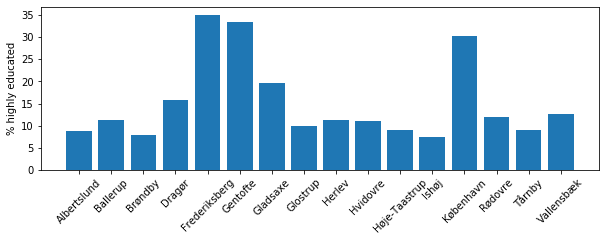

In [50]:
plt.figure(figsize=(10,3))

plt.bar(df_pct_high_education.index,df_pct_high_education.pct_highly_educated*100)
plt.ylabel("% highly educated")
plt.xticks(rotation=45)
plt.show()

There is also a relatively big difference in education in the municipalities. In some ways the graph looks the opposite to the % unemployed.  

#### 4.1.8 Preprocessing and cleaning: day and night population dataset
In the code cell below, the day and night population data set is used to calculate the ratio between the number of citizens who work in the municipality and the number of citizens who live in the municipality.

In [51]:
df_night_day = df_night_day[['KomKode','NBefPer','Dagbefolk']]

data = {'municipality': ['København','Frederiksberg', 'Ballerup', 'Brøndby', 'Dragør', 'Gentofte', 'Gladsaxe', 'Glostrup','Herlev',
            'Albertslund','Hvidovre', 'Høje-Taastrup', 'Rødovre', 'Ishøj','Tårnby', 'Vallensbæk'],
        'KomKode': [101, 147, 151, 153, 155,157,159,161,163,165,167,169,175,183,185,187]}
df_kommune_koder = pd.DataFrame(data, columns=['KomKode','municipality']) 

df_night_day = df_night_day[df_night_day['KomKode'].isin(df_kommune_koder['KomKode'].values)]

df_night_day = df_night_day.merge(df_kommune_koder, how = 'left')[['municipality','NBefPer','Dagbefolk']]
df_night_day = df_night_day.groupby('municipality').agg(np.sum)
df_night_day['day_night_ratio'] = df_night_day['Dagbefolk'].values/df_night_day['NBefPer'].values

df_night_day = df_night_day.sort_index()

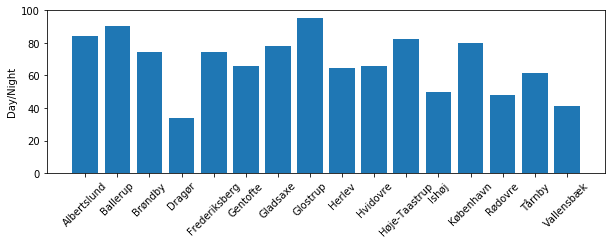

In [52]:
plt.figure(figsize=(10,3))

plt.bar(df_night_day.index,df_night_day.day_night_ratio*100)
plt.ylabel("Day/Night")
plt.xticks(rotation=45)
plt.show()

The Day/Night % is quite surprising in some ways. For example has Copenhagen and Høje-Taastrup the same Day night ratio. The lowest Day/Night ratio is Dragør which maybe it is because of the airport. 

#### 4.1.9 Preprocessing and cleaning: Population density 
In the code cell below, age data sets and the size of the municipalities in square kilometers are used to calculate the number of citizens per square kilometer

In [53]:
df_pop_dens = df_age_dist.groupby("Municipality").sum()[["Number"]].rename(columns={"Number":"Population"})

df_pop_dens = df_pop_dens.loc[focus_municipality]

#Square kilometres is from the english wikipedia
df_pop_dens["km^2"] = [23.04,34.09,20.85,18.41,8.7,25.54,25,13.31,12.04,22.90,78.41,25.94,86.4,12.12,64.95,9.23]

df_pop_dens["Density"] = df_pop_dens["Population"]/df_pop_dens["km^2"]

df_pop_dens = df_pop_dens.sort_index()

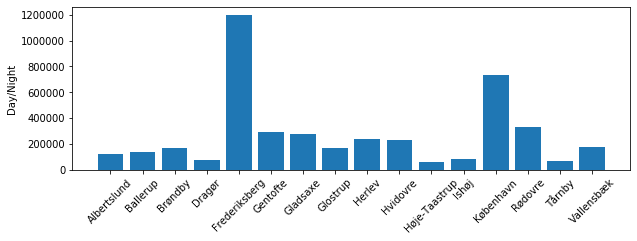

In [54]:
plt.figure(figsize=(10,3))

plt.bar(df_pop_dens.index,df_pop_dens.Density*100)
plt.ylabel("Day/Night")
plt.xticks(rotation=45)
plt.show()

The difference is clear between the municipalities where Copenhagen (København) and Frederiksberg stands strongly out. 

In [55]:
######## SKAL INDSÆTTES DET RIGTIGE STED #############################
#df_passenger = pd.read_csv(os.path.join(path,"passenger_decrease.csv"),index_col=0)
#df_passenger = df_passenger.sort_index()

### 4.2 Data set discussion - Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis
The aim of this section is to find the best measure of the effect of the lockdown and how the various municipalities are affected
#### 4.2.1 Change in speed
The preproccesing for the plot below in done in section 4.1.1.

In [56]:
source = ColumnDataSource(df_all_speed)

p = figure(plot_width=775, plot_height=300, x_axis_type="datetime",toolbar_location=None,
          y_range=(25,32)
          )
p.title.text = 'Avg. speed per day in Copenhagen'

color = bokeh.palettes.Category20[3]

legend_it = []

r = p.line("Date",
           "Hast",
           line_width=2,
           color=color[1],
           alpha=0.8,
           muted_color=color[1],
           muted_alpha=0.2,
           visible=True,
           source=source)

p.yaxis.axis_label = 'Speed in km/t'


hover = HoverTool(tooltips=[
    ('Speed: ', '@Hast km/t'),
    ("Date: ", '@Date{%d-%m}'),
    ("Day: ",'@DayOfWeek')],
    formatters = {'@Date':'datetime'},
    renderers=[r],
    mode="vline")

p.add_tools(hover)

lockdown1_start = pd.to_datetime('20200313')
lockdown1_end = pd.to_datetime('20200318')

lockdown2_start = pd.to_datetime('20200318')
lockdown2_end = pd.to_datetime('20200415')

easter_start = pd.to_datetime('20200404')
easter_end = pd.to_datetime('20200412')

reopening_start = pd.to_datetime('20200415')
reopening_end = pd.to_datetime('20200421')


lockdown1 = BoxAnnotation(left=lockdown1_start, right=lockdown1_end, 
                          fill_color='red', fill_alpha=0.1,visible=True)
lockdown2 = BoxAnnotation(left=lockdown2_start, right=lockdown2_end, 
                           fill_color='red', fill_alpha=0.2,visible=True)

easter = BoxAnnotation(left=easter_start, right=easter_end, 
                       fill_color='yellow', fill_alpha=0.2,visible=True)

reopening = BoxAnnotation(left=reopening_start, right=reopening_end, 
                       fill_color='green', fill_alpha=0.1,visible=True)

p.add_layout(lockdown1)
p.add_layout(lockdown2)
p.add_layout(easter)
p.add_layout(reopening)


lockdown1_cit = Label(x=250, y=230, x_units='screen', y_units='screen',
                 text='First step of lockdown', render_mode='canvas',
                 border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0,
                 text_font_size='8pt')

lockdown2_cit = Label(x=277, y=210, x_units='screen', y_units='screen',
                 text='Second st"ep of lockdown', render_mode='canvas',
                 border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0,
                 text_font_size='8pt')

easter_cit = Label(x=483, y=230, x_units='screen', y_units='screen',
                 text='Easter Break', render_mode='canvas',
                 border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0,
                 text_font_size='8pt')

opening_cit = Label(x=600, y=230, x_units='screen', y_units='screen',
                 text='Opening', render_mode='canvas',
                 border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0,
                 text_font_size='8pt')


p.add_layout(lockdown1_cit)
p.add_layout(lockdown2_cit)
p.add_layout(easter_cit)
p.add_layout(opening_cit)

show(p)

skriv hvad vi kan se på grafen og nu undersøger vi hvordan det ser ud i de enkelte kommuner 

In [57]:
mun_map = folium.Map(location=[55.676098,12.568337],zoom_start=11,tiles='OpenStreetMap')

colormap = linear.YlOrRd_04.scale(avg_speed["per_increase"].min(),avg_speed["per_increase"].max())

df_dict = avg_speed["per_increase"]

folium.GeoJson(
    big_cph,
    name='Percentage increase in speed after lockdown',
    style_function=lambda feature: {
        'fillColor': colormap(df_dict[feature['properties']['KOMNAVN']]),
        'color': 'black',
        'weight': 1,
        #'dashArray': '5, 5',
        'fillOpacity': 1,
    }
).add_to(mun_map)

folium.LayerControl(position="topright",collapsed=False).add_to(mun_map)

colormap.caption = 'Percentage increase in speed'
colormap.add_to(mun_map)

coordinates = [[55.693587,12.344985],[55.734238,12.364346],
               [55.653268,12.418906],[55.592974,12.645970],
               [55.682220,12.514292],[55.753021,12.552256],
               [55.747834,12.472433],[55.671153,12.398190],
               [55.735531,12.434457],[55.634567,12.465933],
               [55.665301,12.266118],[55.623098,12.330763],
               [55.711402,12.533741],[55.682886,12.448000],
               [55.610549,12.600898],[55.636898,12.368548]]

coordinates_dict = dict(zip(focus_municipality,coordinates))

for m in focus_municipality:
    folium.map.Marker(
        coordinates_dict[m],
        icon=DivIcon(
            icon_size=(150,36),
            icon_anchor=(25,0),
            html=f'<div style="font-size: 10pt">{m}</div>',
            )
        ).add_to(mun_map)

mun_map

In [61]:
avg_ha

,Kommune,avg_speed_feb,avg_speed_mar,per_increase
0,Albertslund,31.526042,33.109980,5.024221
1,Ballerup,31.034296,32.948306,6.167402
2,Brøndby,31.256112,33.371985,6.769472
3,Dragør,33.894067,35.389472,4.411996
4,Frederiksberg,20.906883,22.672073,8.443108
5,Gentofte,28.338751,29.541186,4.243077
6,Gladsaxe,26.641122,28.054811,5.306418
7,Glostrup,27.985348,29.842115,6.634781
8,Herlev,25.697821,27.203502,5.859178
9,Hvidovre,28.194169,29.694640,5.321920


In [85]:
#df_hast_change
df_avg_hast = df_hast_change
df_avg_hast = df_avg_hast.reset_index()
df_avg_hast.columns = ["Municipality","pct_increase"]
df_avg_hast = df_avg_hast.set_index("Municipality")

#Creating format fitting for bokeh
source = ColumnDataSource(df_avg_hast)

#Creating a list for the x-axis on the bar-chart. 
x_range = [str(h) for h in source.data['Municipality']]

#Generating 14 colors for the different focus crimes  
color = bokeh.palettes.Category20[20][2]

bar ={} # to store vbars

#Creating figure frame with title, x -and y labels and disabling toolbar. 
p = figure(x_range=FactorRange(factors=x_range),
           title='Increase in speed per municipality',
           x_axis_label='Municipality',
           y_axis_label='Increase in speed (%)',
           plot_width=700,plot_height=400,
           toolbar_location = None)


r = p.vbar("Municipality",  top="pct_increase", source= source, width=0.8, 
             fill_alpha=0.5,line_color=None,
             color=color,visible=True)

p.xaxis.major_label_orientation = math.pi/4

mun = r.name #extracting the name of each rendered crime
hover = HoverTool(tooltips=[
    ('Increase in speed (%)' , '@pct_increase{0.2f} %') #@ - extracts the fractions from each focuscrime
], renderers=[r]) # assigns the hoved effect to the correct bar rendering

p.add_tools(hover)
    
p.y_range.start = 0 #setting the y range from zero

show(p)

#### 4.2.2 how should the change in public transport be measured?
As mentioned, the passenger data set (section 3.1.3) contains both on- and off boarding information from 4 periods, which allows to measure the activity of public transport in several different ways. one could use both on and off as a measure of activity, a combination of them, or just one of them. In addition, it is also possible to measure the effect of the lockdown in several different ways, either by comparing the same month for the two years, or comparing with the previous month. From FIG. 4.2.2.1 it is considered which choice will be best.

In [86]:
#Creating format fitting for bokeh
source = ColumnDataSource(df_pass)

#Creating a list for the x-axis on the bar-chart. 
x_range = [str(h) for h in source.data['Kommune']]

#Generating 14 colors for the different focus crimes  
colors = bokeh.palettes.Category20[20][0::2]

bar ={} # to store vbars

#Creating figure frame with title, x -and y labels and disabling toolbar. 
p = figure(x_range=FactorRange(factors=x_range),
           title='fig 4.2.2.1: Barchart of average number of on- and off boarding passengers',
           x_axis_label='Municipality',
           y_axis_label='Frequency',
           plot_width=950,plot_height=500)

#List of on - and offboarding passengers in february and march for 2019 and 2020
boardings = ["På_201902","Af_201902","På_201903","Af_201903","På_202002","Af_202002","På_202003","Af_202003"]


#Generating barcharts to p 
for indx,i in enumerate(boardings):
    bar[i] = p.vbar("Kommune",  top=i, source= source, width=0.8, 
                 fill_alpha=0.5,line_color=None,
                 color=colors[indx],visible=False)

# rotate x labels
p.xaxis.major_label_orientation = math.pi/4

# define legends
legend_names = {"På_201902":"Passengers on in February 2019","På_201903":"Passengers on in March 2019",
                "På_202002":"Passengers on in February 2020","På_202003":"Passengers on in March 2020",
                "Af_201902":"Passengers off in February 2019","Af_201903":"Passengers off in March 2019",
                "Af_202002":"Passengers off in February 2020","Af_202003":"Passengers off in March 2020"}

items = [(legend_names[i],[bar[i]]) for i in boardings] #Creating list of tuples with focus crime name and belonging bar chart.
legend = Legend(items=items,location=(0,90)) # Creating legends with 'items'
p.add_layout(legend,'left') # Adding legends to ´p´ and setting location. 

p.legend.click_policy="hide"
p.legend.title = 'Click on names below to see barcharts'
show(p)

If on- and off borading passgengers is compared from the same periods (eg Passengers on in March 2020 and Passengers off in March 2020) it can be seen that the number of passengers is almost the same for each municipality. Therefore it is considered sufficient to use on passengers as a measure of public transport activity. If the number in passages is compared for February and March 2019, it can be seen that the number is more or less the same for each municipality. On the other hand, if February 2019 is compared to February 2020, it can be seen that in some municipalities there is a relatively large difference. This difference is largely due to the creation of the new metro, which has led to a decrease in the number of bus passes. For these reasons, it is considered that the best measure for the impact of the lockdown is by comparing on boarding passengers for February 2020 and March 2020. This is done in fig 4.2.2.2, by taking the ratio of consecutive months 



In [87]:
#Creating format fitting for bokeh
source = ColumnDataSource(df_pass_diff)

#Creating a list for the x-axis on the bar-chart. 
x_range = [str(h) for h in source.data['Kommune']]

#Generating 14 colors for the different focus crimes  
colors = bokeh.palettes.Category20[8][0::2]

bar ={} # to store vbars

#Creating figure frame with title, x -and y labels and disabling toolbar. 
p = figure(x_range=FactorRange(factors=x_range),
           title='fig 4.2.2.2: Passengers in march in relation to february in 2019 and 2020',
           x_axis_label='Municipalities',
           y_axis_label='%',
           plot_width=950,plot_height=500)

#List of on - and offboarding passengers in february and march for 2019 and 2020
years = ["per_2019","per_2020"]


#Generating barcharts to p 
for indx,i in enumerate(years):
    bar[i] = p.vbar("Kommune",  top=i, source= source, width=0.8, 
                 fill_alpha=0.5,line_color=None,
                 color=colors[indx],visible=False)
    
p.xaxis.major_label_orientation = math.pi/4

legend_names = {"per_2019":"Mar 2019 / Feb 2019  %",
                "per_2020":"Mar 2020 / Feb 2020 %"}

items = [(legend_names[i],[bar[i]]) for i in years] #Creating list of tuples with focus crime name and belonging bar chart.
legend = Legend(items=items,location=(0,90)) # Creating legends with 'items'
p.add_layout(legend,'left') # Adding legends to ´p´ and setting location. 

p.legend.click_policy="hide"
p.legend.title = 'Click on names below to see barcharts'
show(p)

Figure XX shows that the activity in public bus transport has decreased significantly due to lockdown, in all Municipalities. eg. it can be seen that the number of passengers in Albertslund in March 2020 is only about 50% of February 2020, when in 2019 it was about 120%

In [97]:
colormap = linear.YlOrRd_04.scale(df_pass_diff["pct_drop_2020"].min(),df_pass_diff["pct_drop_2020"].max())

df_dict = df_pass_diff["pct_drop_2020"]

mun_map = folium.Map(location=[55.676098,12.568337],zoom_start=10.5,tiles='OpenStreetMap')

folium.GeoJson(
    big_cph,
    name='Percentage decrease for boarding passengers',
    style_function=lambda feature: {
        'fillColor': colormap(df_dict[feature['properties']['KOMNAVN']]),
        'color': 'black',
        'weight': 1,
        #'dashArray': '5, 5',
        'fillOpacity': 1,
    }
).add_to(mun_map)

folium.LayerControl(position="bottomright",collapsed=False).add_to(mun_map)

colormap.caption = 'Percentage decrease from march 2019 to march 2020'
colormap.add_to(mun_map)

coordinates = [[55.693587,12.344985],[55.734238,12.364346],
               [55.653268,12.418906],[55.592974,12.645970],
               [55.682220,12.514292],[55.753021,12.552256],
               [55.747834,12.472433],[55.671153,12.398190],
               [55.735531,12.434457],[55.634567,12.465933],
               [55.665301,12.266118],[55.623098,12.330763],
               [55.711402,12.533741],[55.682886,12.448000],
               [55.610549,12.600898],[55.636898,12.368548]]

coordinates_dict = dict(zip(focus_municipality,coordinates))

for m in focus_municipality:
    
    folium.map.Marker(
        coordinates_dict[m],
        icon=DivIcon(
            icon_size=(150,36),
            icon_anchor=(25,0),
            html=f'<div style="font-size: 10pt">{m}</div>',
            )
        ).add_to(mun_map)

    
mun_map


colormap = linear.YlOrRd_04.scale(df_pass_diff["pct_drop_2020"].min(),df_pass_diff["pct_drop_2020"].max())

df_dict = df_pass_diff["pct_drop_2020"]

mun_map = folium.Map(location=[55.676098,12.568337],zoom_start=10.5,tiles='OpenStreetMap')

folium.GeoJson(
    big_cph,
    name='Percentage decrease for boarding passengers',
    style_function=lambda feature: {
        'fillColor': colormap(df_dict[feature['properties']['KOMNAVN']]),
        'color': 'black',
        'weight': 1,
        #'dashArray': '5, 5',
        'fillOpacity': 1,
    }
).add_to(mun_map)

folium.LayerControl(position="bottomright",collapsed=False).add_to(mun_map)

colormap.caption = 'Percentage decrease from February 2020 to March 2020'
colormap.add_to(mun_map)

coordinates = [[55.693587,12.344985],[55.734238,12.364346],
               [55.653268,12.418906],[55.592974,12.645970],
               [55.682220,12.514292],[55.753021,12.552256],
               [55.747834,12.472433],[55.671153,12.398190],
               [55.735531,12.434457],[55.634567,12.465933],
               [55.665301,12.266118],[55.623098,12.330763],
               [55.711402,12.533741],[55.682886,12.448000],
               [55.610549,12.600898],[55.636898,12.368548]]

coordinates_dict = dict(zip(focus_municipality,coordinates))

for m in focus_municipality:
    
    folium.map.Marker(
        coordinates_dict[m],
        icon=DivIcon(
            icon_size=(150,36),
            icon_anchor=(25,0),
            html=f'<div style="font-size: 10pt">{m}</div>',
            )
        ).add_to(mun_map)

    
mun_map

In [91]:
df_pass_diff

,per_2019,per_2020,pct_drop_2020
Kommune,,,
Albertslund,119.655026,49.031122,0.509689
Ballerup,102.490509,57.803686,0.421963
Brøndby,106.464745,64.742848,0.352572
Dragør,94.909764,62.819870,0.371801
Frederiksberg,96.794111,54.672511,0.453275
Gentofte,107.042725,56.630589,0.433694
Gladsaxe,99.029512,60.679473,0.393205
Glostrup,103.259854,60.519895,0.394801
Herlev,98.262364,59.520179,0.404798


#### 4.2.2

## Data Analysis
lille intro 



### Describe your data analysis and explain what you've learned about the dataset.
#### Analysis of speed change

In [51]:
df_variables = df_pop_dens[["Density"]].copy()
df_variables["Log Density"] = np.log(df_pop_dens[["Density"]].copy())
df_variables["DagNatRatio"] = df_night_day["day_night_ratio"]
df_variables["pct_unemployed"] = df_unemployment["percent_unemp"]
df_variables["pct_highly_educated"] = df_pct_high_education["pct_highly_educated"]
df_variables["pct_not_vestern"] = df_ethnic["pct_not_vestern"]
df_variables["income"] = df_income["2018"].values
df_variables["median_age"] = df_median_age["Median_age"].values
df_variables["speed_change"] = df_hast_change["pct_increase"]

df_variables["DagNatRatio"] = round(df_variables["DagNatRatio"]*100,2)
df_variables["speed_change"] = round(df_variables["speed_change"]*100,2)
df_variables["pct_highly_educated"] = round(df_variables["pct_highly_educated"]*100,2)
df_variables["pct_not_vestern"] = round(df_variables["pct_not_vestern"]*100,2)


linear_regressor = LinearRegression()

df_temp = pd.DataFrame()

#Generating 14 colors for the different focus crimes  
color = bokeh.palettes.Category20[20][::2]

for x in df_variables.columns:
    
    X = df_variables[x].to_numpy().reshape(-1,1)
    Y = df_variables.speed_change.to_numpy().reshape(-1,1)
    
    linear_regressor.fit(X,Y)
    
    Y_pred = linear_regressor.predict(X)
    
    Y_pred = list(Y_pred.squeeze())
    
    name = "prediction_" + x
    
    df_temp[name] = Y_pred

df_temp = df_temp.set_index(df_variables.index)

df_variables = df_variables.join(df_temp,on="Municipality")

source = ColumnDataSource(data = df_variables)

f = [0]*8
toggle = [0]*16

var_dict = {"Density":" Density (persons/km^2)",
            "Log Density":"Log Density (persons/km^2)",
            "DagNatRatio":"Day/Night %",
            "pct_unemployed": "unemployment %",
            "pct_highly_educated":"% with high education",
            "pct_not_vestern":"% with non-vestern background",
            "income": "Income",
            "median_age": "Median age",
           }

for i,var in enumerate(df_variables.columns[:8]):
    
    name = var_dict[var]
    
    TOOLTIPS = [("Municipality: ", "@Municipality"),
            (name, f"@{var}"),
            ("Increase in speed: ","@speed_change{0.2f}")]

    # create figure
    name = var_dict[var]
    f[i] = figure(plot_width=400,plot_height=350,
               title = f'Speed increase vs. {name}' ,
               x_axis_label=f'{name}',
               y_axis_label='% increase in speed',
               background_fill_color = "white",background_fill_alpha = 0.8, 
               border_fill_color = "white", border_fill_alpha = 0.8, tooltips=TOOLTIPS,
               #y_axis_type="log",
               #x_axis_type= x_axis_type,
               toolbar_location = None,
               tools = "box_select",

              )
    cor = df_variables[["speed_change",var]].corr()

    R_sqrt = round(cor.iloc[0,1]**2,3)

    R_sqrt_Label = Label(x=200, y=5, x_units='screen', y_units='screen',
                 text=f'  R^2 value: {R_sqrt}  ', render_mode='canvas',
                 border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0,
                 text_font_size='12pt',visible=False
                 #text_font="times"
                 )
    # Create plot
    f[i].circle(x = var, y = 'speed_change', size=10,source=source,color=color[i])
    
    predict_name = "prediction_" + var
    #Create linear regression line
    line = f[i].line(x=var, y = predict_name,source=source,color="grey",line_width=2,visible=False)
    

    f[i].add_layout(R_sqrt_Label)
    
    
    toggle1 = Toggle(label="Show regression line", button_type="default", active=False,max_width=400)
    toggle1.js_link('active', line, 'visible')
    
    toggle2 = Toggle(label="Show R^2 value", button_type="default", active=False,width=400)
    toggle2.js_link('active', R_sqrt_Label, 'visible')
    
    toggle[i] = toggle1
    toggle[i+8] = toggle2

toggles1 = column(toggle[0],toggle[8])
toggles2 = column(toggle[1],toggle[9])
toggles3 = column(toggle[2],toggle[10])
toggles4 = column(toggle[3],toggle[11])
toggles5 = column(toggle[4],toggle[12])
toggles6 = column(toggle[5],toggle[13])
toggles7 = column(toggle[6],toggle[14])
toggles8 = column(toggle[7],toggle[15])

l = layout([f[0],f[1]],
           [toggles1,toggles2],
           [f[2],f[3]],
           [toggles3,toggles4],
           [f[4],f[5]],
           [toggles5,toggles6],
           [f[6],f[7]],
           [toggles7,toggles8]
          )

show(l)

#### Analysis of passenger

In [52]:
df_variables = df_pop_dens[["Density"]].copy()
df_variables["Log Density"] = np.log(df_pop_dens[["Density"]].copy())
df_variables["DagNatRatio"] = df_night_day["day_night_ratio"]
df_variables["pct_unemployed"] = df_unemployment["percent_unemp"]
df_variables["pct_highly_educated"] = df_pct_high_education["pct_highly_educated"]
df_variables["pct_not_vestern"] = df_ethnic["pct_not_vestern"]
df_variables["income"] = df_income["2018"].values
df_variables["median_age"] = df_median_age["Median_age"].values
df_variables["passenger_change"] = df_pass_diff["pct_drop_2020"]

df_variables["DagNatRatio"] = round(df_variables["DagNatRatio"]*100,2)
df_variables["passenger_change"] = round(df_variables["passenger_change"]*100,2)
df_variables["pct_highly_educated"] = round(df_variables["pct_highly_educated"]*100,2)
df_variables["pct_not_vestern"] = round(df_variables["pct_not_vestern"]*100,2)


linear_regressor = LinearRegression()

df_temp = pd.DataFrame()

#Generating 14 colors for the different focus crimes  
color = bokeh.palettes.Category20[20][::2]

for x in df_variables.columns:
    
    X = df_variables[x].to_numpy().reshape(-1,1)
    Y = df_variables.passenger_change.to_numpy().reshape(-1,1)
    
    linear_regressor.fit(X,Y)
    
    Y_pred = linear_regressor.predict(X)
    
    Y_pred = list(Y_pred.squeeze())
    
    name = "prediction_" + x
    
    df_temp[name] = Y_pred

df_temp = df_temp.set_index(df_variables.index)

df_variables = df_variables.join(df_temp,on="Municipality")

source = ColumnDataSource(data = df_variables)

f = [0]*8
toggle = [0]*16

var_dict = {"Density":" Density (persons/km^2)",
            "Log Density":"Log Density (persons/km^2)",
            "DagNatRatio":"Day/Night %",
            "pct_unemployed": "unemployment %",
            "pct_highly_educated":"% with high education",
            "pct_not_vestern":"% with non-vestern background",
            "income": "Income",
            "median_age": "Median age",
           }

for i,var in enumerate(df_variables.columns[:8]):
    
    name = var_dict[var]
    
    TOOLTIPS = [("Municipality: ", "@Municipality"),
            (name, f"@{var}"),
            ("Increase in speed: ","@passenger_change{0.2f}")]

    # create figure
    name = var_dict[var]
    f[i] = figure(plot_width=400,plot_height=350,
               title = f'Speed increase vs. {name}' ,
               x_axis_label=f'{name}',
               y_axis_label='% increase in speed',
               background_fill_color = "white",background_fill_alpha = 0.8, 
               border_fill_color = "white", border_fill_alpha = 0.8, tooltips=TOOLTIPS,
               #y_axis_type="log",
               #x_axis_type= x_axis_type,
               toolbar_location = None,
               tools = "box_select",

              )
    cor = df_variables[["passenger_change",var]].corr()

    R_sqrt = round(cor.iloc[0,1]**2,3)

    R_sqrt_Label = Label(x=200, y=5, x_units='screen', y_units='screen',
                 text=f'  R^2 value: {R_sqrt}  ', render_mode='canvas',
                 border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0,
                 text_font_size='12pt',visible=False
                 #text_font="times"
                 )
    # Create plot
    f[i].circle(x = var, y = 'passenger_change', size=10,source=source,color=color[i])
    
    predict_name = "prediction_" + var
    #Create linear regression line
    line = f[i].line(x=var, y = predict_name,source=source,color="grey",line_width=2,visible=False)
    

    f[i].add_layout(R_sqrt_Label)
    
    
    toggle1 = Toggle(label="Show regression line", button_type="default", active=False,max_width=400)
    toggle1.js_link('active', line, 'visible')
    
    toggle2 = Toggle(label="Show R^2 value", button_type="default", active=False,width=400)
    toggle2.js_link('active', R_sqrt_Label, 'visible')
    
    toggle[i] = toggle1
    toggle[i+8] = toggle2

toggles1 = column(toggle[0],toggle[8])
toggles2 = column(toggle[1],toggle[9])
toggles3 = column(toggle[2],toggle[10])
toggles4 = column(toggle[3],toggle[11])
toggles5 = column(toggle[4],toggle[12])
toggles6 = column(toggle[5],toggle[13])
toggles7 = column(toggle[6],toggle[14])
toggles8 = column(toggle[7],toggle[15])

l = layout([f[0],f[1]],
           [toggles1,toggles2],
           [f[2],f[3]],
           [toggles3,toggles4],
           [f[4],f[5]],
           [toggles5,toggles6],
           [f[6],f[7]],
           [toggles7,toggles8]
          )

show(l)

### machine-learning: PCA.
The limited number of municipalities in our dataset excluded the opportunity to train a model that allowed all the variables to say something about speed change and change in passages. Instead, it was chosen to use PCA to combine all the variables, thus being able to say what "conditions" would have to be met to see a large or small change in speed and passengers. It is described here why the analysis in the main story makes sense, based on a 2d example, in the code cell including samples 100.0000 values from a 2 dimensional Gaussian distribution, We calculate the first principle component and plot its line through the mean value of the distribution.  


Text(0, 0.5, 'X2')

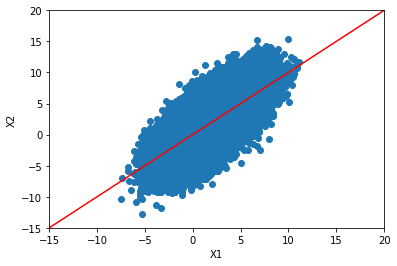

In [6]:
mean = np.array([2,2])
cov = np.array([[5,5],[5,10]])
t = np.random.multivariate_normal(mean, cov, 100000)
scaler = StandardScaler()
scaler.fit(t)
scaled_data = scaler.transform(t)
pca = PCA(n_components=1)
pca.fit(scaled_data)
p1 = np.mean(t,axis = 0) + (pca.components_[0])*-100
p2 = np.mean(t,axis = 0) + (pca.components_[0])*100
plt.scatter(t[:,0],t[:,1])
plt.plot([p1[0],p2[0]],[p1[1],p2[1]],'r')
plt.xlim([-15,20])
plt.ylim([-15,20])
plt.xlabel('X1')
plt.ylabel('X2')


The blue dots are the sampled values and the red line is PCA1, where the values of PCA1 are $[0.707, 0.707]^T$, So if an obsevation is to have a high value along pca1, the value of both $x_1$ and $x_2$ must be high, which also tells that if x1 is high then x2 is probably also high (which can also be seen where the blue dots are collected). This is the reasoning behind using pca to analyze which demographic variables must be relatively low / high at the same time, so that there is a high probability of seeing e.g. a large drop in the number of passengers.


## Genre. Which genre of data story did you use?
### Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?

### Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

## Visualizations

### Explain the visualizations you've chosen.

### Why are they right for the story you want to tell?

## Discussion. Think critically about your creation
### What went well?
Our aim was to create a easily digestive and visually appealing narrative with as little text as possible while it invites the user to explore for themselves while it is possible to follow for most. We believe that we succeeded in doing that - even for the PCA part which often can become a confusing endeavour. We also believe that we accomplished to find possible explanations for why the increase in speed and decrease in passengers is different for the municipalities which not was a given. 

However, when that is said and done we would have done many things different if we could do it all ove


### What is still missing? What could be improved?, Why?

## Contributions. Who did what?
### You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That's what you should explain).

### Make sure that you use references when they're needed and follow academic standards